In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import thefuzz 
from thefuzz import process
import plotly.express as px
data_super_market = pd.read_csv(r"C:\Users\szeya\Downloads\archive (27)\supermarket.csv")

In [2]:
data_super_market.sample(5)

Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
4700    4701  CA-2018-140298  11/05/2018  17/05/2018  Standard Class   
2872    2873  CA-2018-135167  15/06/2018  20/06/2018  Standard Class   
8387    8388  CA-2016-149601  28/05/2016  03/06/2016  Standard Class   
4530    4531  CA-2017-118759  14/11/2017  17/11/2017     First Class   
7040    7041  CA-2018-103443  17/12/2018  23/12/2018  Standard Class   

     Customer ID    Customer Name      Segment        Country           City  \
4700    JK-16120       Julie Kriz  Home Office  United States         Austin   
2872    SC-20800   Stuart Calhoun     Consumer  United States    Los Angeles   
8387    TB-21625      Trudy Brown     Consumer  United States     Manchester   
4530    MB-17305  Maria Bertelson     Consumer  United States  New York City   
7040    AT-10735    Annie Thurman     Consumer  United States  New York City   

            State  Postal Code   Region       Product ID         Category  \
4700        Texas      78745.0  Central  OFF-ST-10004180  Office Supplies   
2872   California      90036.0     West  OFF-AR-10002399  Office Supplies   
8387  Connecticut       6040.0     East  OFF-ST-10001328  Office Supplies   
4530     New York      10009.0     East  FUR-CH-10002335        Furniture   
7040     New York      10009.0     East  OFF-BI-10001617  Office Supplies   

     Sub-Category                                       Product Name    Sales  
4700      Storage                          Safco Commercial Shelving   74.416  
2872          Art  Dixon Prang Watercolor Pencils, 10-Color Set w...    4.260  
8387      Storage          Personal Filing Tote with Lid, Black/Gray   77.550  
4530       Chairs                             Hon GuestStacker Chair  408.006  
7040      Binders                             GBC Wire Binding Combs   24.816

# understanding data -preprocessing - cleaning


In [3]:
data_super_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
data_super_market["Order Date"] =pd.to_datetime(data_super_market["Order Date"], infer_datetime_format= True  ,format="%d-%m-%Y")
data_super_market["Ship Date"]= pd.to_datetime(data_super_market["Ship Date"] , infer_datetime_format=True  ,format="%d-%m-%Y")

C:\Users\szeya\AppData\Local\Temp\ipykernel_6484\1827388568.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_super_market["Order Date"] =pd.to_datetime(data_super_market["Order Date"], infer_datetime_format= True  ,format="%d-%m-%Y")
C:\Users\szeya\AppData\Local\Temp\ipykernel_6484\1827388568.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_super_market["Ship Date"]= pd.to_datetime(data_super_market["Ship Date"] , infer_datetime_format=True  ,format="%d-%m-%Y")


In [5]:
data_super_market.sample(2)

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
7135    7136  CA-2018-141439 2018-11-26 2018-01-12  Standard Class   
5693    5694  US-2016-138093 2016-10-12 2016-12-16  Standard Class   

     Customer ID  Customer Name      Segment        Country       City  \
7135    TT-21460  Tonja Turnell  Home Office  United States   Richmond   
5693    KM-16225   Kalyca Meade    Corporate  United States  Baltimore   

         State  Postal Code   Region       Product ID         Category  \
7135   Indiana      47374.0  Central  FUR-CH-10004287        Furniture   
5693  Maryland      21215.0     East  OFF-PA-10000143  Office Supplies   

     Sub-Category                     Product Name  Sales  
7135       Chairs         SAFCO Arco Folding Chair  828.6  
5693        Paper  Astroparche Fine Business Paper   26.4

# note
  1- We need to add colum of month and year to timeseries analysis

In [6]:
data_super_market_copy = data_super_market.copy()

In [7]:
data_super_market['year'] = data_super_market["Order Date"].dt.year
data_super_market["month"] = data_super_market["Order Date"].dt.month
data_super_market["duration"]=data_super_market["Ship Date"] - data_super_market["Order Date"]

In [8]:
data_super_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Row ID         9800 non-null   int64          
 1   Order ID       9800 non-null   object         
 2   Order Date     9800 non-null   datetime64[ns] 
 3   Ship Date      9800 non-null   datetime64[ns] 
 4   Ship Mode      9800 non-null   object         
 5   Customer ID    9800 non-null   object         
 6   Customer Name  9800 non-null   object         
 7   Segment        9800 non-null   object         
 8   Country        9800 non-null   object         
 9   City           9800 non-null   object         
 10  State          9800 non-null   object         
 11  Postal Code    9789 non-null   float64        
 12  Region         9800 non-null   object         
 13  Product ID     9800 non-null   object         
 14  Category       9800 non-null   object         
 15  Sub-

In [9]:
data_super_market.set_index("Order Date" , inplace=True)

In [10]:
list_drop = ["Row ID","Order ID","Customer ID"]
data_super_market.drop(columns=list_drop , inplace=True ,  axis= 1)

In [11]:
data_super_market.sample(3)

Ship Date       Ship Mode       Customer Name   Segment  \
Order Date                                                            
2018-11-19 2018-11-26  Standard Class        Art Ferguson  Consumer   
2018-05-14 2018-05-15     First Class           Greg Tran  Consumer   
2017-08-07 2017-08-07        Same Day  Zuschuss Donatelli  Consumer   

                  Country             City    State  Postal Code   Region  \
Order Date                                                                  
2018-11-19  United States  College Station    Texas      77840.0  Central   
2018-05-14  United States          Houston    Texas      77041.0  Central   
2017-08-07  United States     Jacksonville  Florida      32216.0    South   

                 Product ID         Category Sub-Category  \
Order Date                                                  
2018-11-19  FUR-CH-10001973        Furniture       Chairs   
2018-05-14  OFF-PA-10000300  Office Supplies        Paper   
2017-08-07  OFF-PA-10004965  Office Supplies        Paper   

                                                 Product Name    Sales  year  \
Order Date                                                                     
2018-11-19  Office Star Flex Back Scooter Chair with White...  233.058  2018   
2018-05-14                                         Xerox 1936   47.952  2018   
2017-08-07                                         Xerox 1921   15.984  2017   

            month duration  
Order Date                  
2018-11-19     11   7 days  
2018-05-14      5   1 days  
2017-08-07      8   0 days

In [12]:
data_super_market.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9800 entries, 2017-08-11 to 2016-12-01
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Ship Date      9800 non-null   datetime64[ns] 
 1   Ship Mode      9800 non-null   object         
 2   Customer Name  9800 non-null   object         
 3   Segment        9800 non-null   object         
 4   Country        9800 non-null   object         
 5   City           9800 non-null   object         
 6   State          9800 non-null   object         
 7   Postal Code    9789 non-null   float64        
 8   Region         9800 non-null   object         
 9   Product ID     9800 non-null   object         
 10  Category       9800 non-null   object         
 11  Sub-Category   9800 non-null   object         
 12  Product Name   9800 non-null   object         
 13  Sales          9800 non-null   float64        
 14  year           9800 non-null   int64  

note : nan value in [" Postal Code"] 

In [13]:
data_super_market.duplicated().sum()

1

In [14]:
data_super_market.drop_duplicates(inplace=True)

In [15]:
pd.DataFrame(data_super_market.isna().sum())


0
Ship Date       0
Ship Mode       0
Customer Name   0
Segment         0
Country         0
City            0
State           0
Postal Code    11
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
year            0
month           0
duration        0

In [16]:
data_super_market["Country"].unique()

array(['United States'], dtype=object)

In [17]:
data_super_market["State"].value_counts()

California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     453
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
Oregon                   122
New Jersey               122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 41
Nevada        

In [18]:
data_super_market [data_super_market["State"] =="North Dakota"]

Ship Date       Ship Mode       Customer Name      Segment  \
Order Date                                                               
2018-05-20 2018-05-22    Second Class         Nat Carroll     Consumer   
2018-05-20 2018-05-22    Second Class         Nat Carroll     Consumer   
2018-05-20 2018-05-22    Second Class         Nat Carroll     Consumer   
2018-05-20 2018-05-22    Second Class         Nat Carroll     Consumer   
2018-05-20 2018-05-22    Second Class         Nat Carroll     Consumer   
2018-12-28 2019-02-01  Standard Class  Christopher Schild  Home Office   
2018-12-28 2019-02-01  Standard Class  Christopher Schild  Home Office   

                  Country   City         State  Postal Code   Region  \
Order Date                                                             
2018-05-20  United States  Fargo  North Dakota      58103.0  Central   
2018-05-20  United States  Fargo  North Dakota      58103.0  Central   
2018-05-20  United States  Fargo  North Dakota      58103.0  Central   
2018-05-20  United States  Fargo  North Dakota      58103.0  Central   
2018-05-20  United States  Fargo  North Dakota      58103.0  Central   
2018-12-28  United States  Fargo  North Dakota      58103.0  Central   
2018-12-28  United States  Fargo  North Dakota      58103.0  Central   

                 Product ID         Category Sub-Category  \
Order Date                                                  
2018-05-20  OFF-AR-10001953  Office Supplies          Art   
2018-05-20  OFF-AR-10001374  Office Supplies          Art   
2018-05-20  OFF-ST-10003816  Office Supplies      Storage   
2018-05-20  OFF-FA-10001843  Office Supplies    Fasteners   
2018-05-20  OFF-AR-10000657  Office Supplies          Art   
2018-12-28  OFF-AR-10004707  Office Supplies          Art   
2018-12-28  OFF-BI-10004040  Office Supplies      Binders   

                                                 Product Name   Sales  year  \
Order Date                                                                    
2018-05-20  Boston 1645 Deluxe Heavier-Duty Electric Penci...  131.94  2018   
2018-05-20           BIC Brite Liner Highlighters, Chisel Tip   25.92  2018   
2018-05-20                    Fellowes High-Stak Drawer Files  704.76  2018   
2018-05-20                                            Staples    7.41  2018   
2018-05-20  Binney & Smith inkTank Desk Highlighter, Chise...   21.50  2018   
2018-12-28                            Staples in misc. colors    2.48  2018   
2018-12-28                        Wilson Jones Impact Binders   25.90  2018   

            month duration  
Order Date                  
2018-05-20      5   2 days  
2018-05-20      5   2 days  
2018-05-20      5   2 days  
2018-05-20      5   2 days  
2018-05-20      5   2 days  
2018-12-28     12  35 days  
2018-12-28     12  35 days

we can now fill nan value by pos do sate

In [19]:
data_super_market.fillna({"Postal Code" :0  }, inplace =True)

In [20]:
data_super_market[data_super_market["Postal Code"] ==0 ]

Ship Date       Ship Mode     Customer Name      Segment  \
Order Date                                                             
2018-05-12 2018-10-12  Standard Class      Quincy Jones    Corporate   
2016-07-11 2016-09-11    Second Class  Stewart Visinsky     Consumer   
2017-06-04 2017-10-04  Standard Class   Valerie Mitchum  Home Office   
2017-01-23 2017-01-27  Standard Class  Claudia Bergmann    Corporate   
2017-01-23 2017-01-27  Standard Class  Claudia Bergmann    Corporate   
2017-01-23 2017-01-27  Standard Class  Claudia Bergmann    Corporate   
2018-01-19 2018-01-23  Standard Class     Raymond Messe     Consumer   
2018-01-19 2018-01-23  Standard Class     Raymond Messe     Consumer   
2018-01-19 2018-01-23  Standard Class     Raymond Messe     Consumer   
2018-01-19 2018-01-23  Standard Class     Raymond Messe     Consumer   
2016-08-11 2016-12-11  Standard Class      Quincy Jones    Corporate   

                  Country        City    State  Postal Code Region  \
Order Date                                                           
2018-05-12  United States  Burlington  Vermont          0.0   East   
2016-07-11  United States  Burlington  Vermont          0.0   East   
2017-06-04  United States  Burlington  Vermont          0.0   East   
2017-01-23  United States  Burlington  Vermont          0.0   East   
2017-01-23  United States  Burlington  Vermont          0.0   East   
2017-01-23  United States  Burlington  Vermont          0.0   East   
2018-01-19  United States  Burlington  Vermont          0.0   East   
2018-01-19  United States  Burlington  Vermont          0.0   East   
2018-01-19  United States  Burlington  Vermont          0.0   East   
2018-01-19  United States  Burlington  Vermont          0.0   East   
2016-08-11  United States  Burlington  Vermont          0.0   East   

                 Product ID         Category Sub-Category  \
Order Date                                                  
2018-05-12  TEC-AC-10001013       Technology  Accessories   
2016-07-11  FUR-CH-10000595        Furniture       Chairs   
2017-06-04  TEC-PH-10002555       Technology       Phones   
2017-01-23  TEC-AC-10002926       Technology  Accessories   
2017-01-23  OFF-AR-10003477  Office Supplies          Art   
2017-01-23  OFF-ST-10001526  Office Supplies      Storage   
2018-01-19  OFF-PA-10000157  Office Supplies        Paper   
2018-01-19  OFF-PA-10001970  Office Supplies        Paper   
2018-01-19  OFF-AP-10000828  Office Supplies   Appliances   
2018-01-19  OFF-EN-10001509  Office Supplies    Envelopes   
2016-08-11  FUR-BO-10004834        Furniture    Bookcases   

                                                 Product Name    Sales  year  \
Order Date                                                                     
2018-05-12        Logitech ClearChat Comfort/USB Headset H390   205.03  2018   
2016-07-11                    Safco Contoured Stacking Chairs   715.20  2016   
2017-06-04                Nortel Meridian M5316 Digital phone  1294.75  2017   
2017-01-23              Logitech Wireless Marathon Mouse M705    99.98  2017   
2017-01-23                                  4009 Highlighters     8.04  2017   
2017-01-23              Iceberg Mobile Mega Data/Printer Cart  1564.29  2017   
2018-01-19                                          Xerox 191    79.92  2018   
2018-01-19                                         Xerox 1881    12.28  2018   
2018-01-19                    Avanti 4.4 Cu. Ft. Refrigerator   542.94  2018   
2018-01-19                          Poly String Tie Envelopes     2.04  2018   
2016-08-11  Riverside Palais Royal Lawyers Bookcase, Royal...  4404.90  2016   

            month duration  
Order Date                  
2018-05-12      5 153 days  
2016-07-11      7  62 days  
2017-06-04      6 122 days  
2017-01-23      1   4 days  
2017-01-23      1   4 days  
2017-01-23      1   4 days  
2018-01-19      1   4 days  
2018-01-19      1   4 days  
2018-01-19      1   4 days  
2018-01-19

In [21]:
data_super_market[data_super_market["State"] =="Vermont"]

Ship Date       Ship Mode     Customer Name      Segment  \
Order Date                                                             
2018-05-12 2018-10-12  Standard Class      Quincy Jones    Corporate   
2016-07-11 2016-09-11    Second Class  Stewart Visinsky     Consumer   
2017-06-04 2017-10-04  Standard Class   Valerie Mitchum  Home Office   
2017-01-23 2017-01-27  Standard Class  Claudia Bergmann    Corporate   
2017-01-23 2017-01-27  Standard Class  Claudia Bergmann    Corporate   
2017-01-23 2017-01-27  Standard Class  Claudia Bergmann    Corporate   
2018-01-19 2018-01-23  Standard Class     Raymond Messe     Consumer   
2018-01-19 2018-01-23  Standard Class     Raymond Messe     Consumer   
2018-01-19 2018-01-23  Standard Class     Raymond Messe     Consumer   
2018-01-19 2018-01-23  Standard Class     Raymond Messe     Consumer   
2016-08-11 2016-12-11  Standard Class      Quincy Jones    Corporate   

                  Country        City    State  Postal Code Region  \
Order Date                                                           
2018-05-12  United States  Burlington  Vermont          0.0   East   
2016-07-11  United States  Burlington  Vermont          0.0   East   
2017-06-04  United States  Burlington  Vermont          0.0   East   
2017-01-23  United States  Burlington  Vermont          0.0   East   
2017-01-23  United States  Burlington  Vermont          0.0   East   
2017-01-23  United States  Burlington  Vermont          0.0   East   
2018-01-19  United States  Burlington  Vermont          0.0   East   
2018-01-19  United States  Burlington  Vermont          0.0   East   
2018-01-19  United States  Burlington  Vermont          0.0   East   
2018-01-19  United States  Burlington  Vermont          0.0   East   
2016-08-11  United States  Burlington  Vermont          0.0   East   

                 Product ID         Category Sub-Category  \
Order Date                                                  
2018-05-12  TEC-AC-10001013       Technology  Accessories   
2016-07-11  FUR-CH-10000595        Furniture       Chairs   
2017-06-04  TEC-PH-10002555       Technology       Phones   
2017-01-23  TEC-AC-10002926       Technology  Accessories   
2017-01-23  OFF-AR-10003477  Office Supplies          Art   
2017-01-23  OFF-ST-10001526  Office Supplies      Storage   
2018-01-19  OFF-PA-10000157  Office Supplies        Paper   
2018-01-19  OFF-PA-10001970  Office Supplies        Paper   
2018-01-19  OFF-AP-10000828  Office Supplies   Appliances   
2018-01-19  OFF-EN-10001509  Office Supplies    Envelopes   
2016-08-11  FUR-BO-10004834        Furniture    Bookcases   

                                                 Product Name    Sales  year  \
Order Date                                                                     
2018-05-12        Logitech ClearChat Comfort/USB Headset H390   205.03  2018   
2016-07-11                    Safco Contoured Stacking Chairs   715.20  2016   
2017-06-04                Nortel Meridian M5316 Digital phone  1294.75  2017   
2017-01-23              Logitech Wireless Marathon Mouse M705    99.98  2017   
2017-01-23                                  4009 Highlighters     8.04  2017   
2017-01-23              Iceberg Mobile Mega Data/Printer Cart  1564.29  2017   
2018-01-19                                          Xerox 191    79.92  2018   
2018-01-19                                         Xerox 1881    12.28  2018   
2018-01-19                    Avanti 4.4 Cu. Ft. Refrigerator   542.94  2018   
2018-01-19                          Poly String Tie Envelopes     2.04  2018   
2016-08-11  Riverside Palais Royal Lawyers Bookcase, Royal...  4404.90  2016   

            month duration  
Order Date                  
2018-05-12      5 153 days  
2016-07-11      7  62 days  
2017-06-04      6 122 days  
2017-01-23      1   4 days  
2017-01-23      1   4 days  
2017-01-23      1   4 days  
2018-01-19      1   4 days  
2018-01-19      1   4 days  
2018-01-19      1   4 days  
2018-01-19

In [22]:
len(data_super_market[data_super_market["State"] =="Vermont"])

11

#note from this we dont have any inform abbout Vermont	postcode we can  get from google

In [23]:
data_super_market["Postal Code"].replace({0:5401 }, inplace =True)

In [24]:
pd.DataFrame(data_super_market.isna().sum())

0
Ship Date      0
Ship Mode      0
Customer Name  0
Segment        0
Country        0
City           0
State          0
Postal Code    0
Region         0
Product ID     0
Category       0
Sub-Category   0
Product Name   0
Sales          0
year           0
month          0
duration       0

# eda

In [25]:
data_super_market.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9799 entries, 2017-08-11 to 2016-12-01
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Ship Date      9799 non-null   datetime64[ns] 
 1   Ship Mode      9799 non-null   object         
 2   Customer Name  9799 non-null   object         
 3   Segment        9799 non-null   object         
 4   Country        9799 non-null   object         
 5   City           9799 non-null   object         
 6   State          9799 non-null   object         
 7   Postal Code    9799 non-null   float64        
 8   Region         9799 non-null   object         
 9   Product ID     9799 non-null   object         
 10  Category       9799 non-null   object         
 11  Sub-Category   9799 non-null   object         
 12  Product Name   9799 non-null   object         
 13  Sales          9799 non-null   float64        
 14  year           9799 non-null   int64  

In [26]:
data_super_market.sample(5)

Ship Date       Ship Mode    Customer Name      Segment  \
Order Date                                                            
2018-10-22 2018-10-27  Standard Class     David Wiener    Corporate   
2018-09-14 2018-09-15     First Class     Pamela Stobb     Consumer   
2017-11-18 2017-11-22  Standard Class    Tracy Collins  Home Office   
2018-12-05 2018-05-14    Second Class  Cynthia Arntzen     Consumer   
2017-12-25 2018-01-01  Standard Class   Laurel Workman    Corporate   

                  Country          City         State  Postal Code Region  \
Order Date                                                                  
2018-10-22  United States       Redmond        Oregon      97756.0   West   
2018-09-14  United States  Philadelphia  Pennsylvania      19140.0   East   
2017-11-18  United States   Los Angeles    California      90008.0   West   
2018-12-05  United States      Vineland    New Jersey       8360.0   East   
2017-12-25  United States       Phoenix       Arizona      85023.0   West   

                 Product ID         Category Sub-Category  \
Order Date                                                  
2018-10-22  FUR-TA-10002607        Furniture       Tables   
2018-09-14  OFF-BI-10003707  Office Supplies      Binders   
2017-11-18  TEC-PH-10003357       Technology       Phones   
2018-12-05  TEC-AC-10004859       Technology  Accessories   
2017-12-25  FUR-TA-10002607        Furniture       Tables   

                                             Product Name    Sales  year  \
Order Date                                                                 
2018-10-22                           KI Conference Tables  177.225  2018   
2018-09-14                           Aluminum Screw Posts   18.312  2018   
2017-11-18  Grandstream GXP2100 Mainstream Business Phone   61.192  2017   
2018-12-05             Maxell Pro 80 Minute CD-R, 10/Pack   87.400  2018   
2017-12-25                           KI Conference Tables   35.445  2017   

            month  duration  
Order Date                   
2018-10-22     10    5 days  
2018-09-14      9    1 days  
2017-11-18     11    4 days  
2018-12-05     12 -205 days  
2017-12-25     12    7 days

## What is the country with the most orders?

Text(0, 0.5, 'Frequancey')

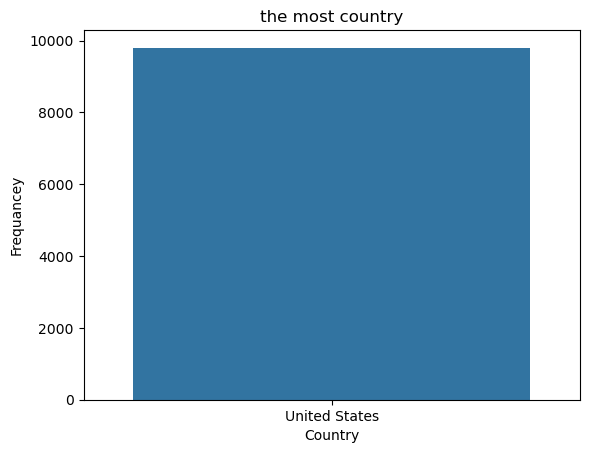

In [27]:
data_super_market.Country.value_counts() , sns.countplot(x=data_super_market.Country)
plt.title("the most country")
plt.ylabel("Frequancey")

#the super market have all ships in USA ONLY 

# What is the city with the most orders?

<Axes: >

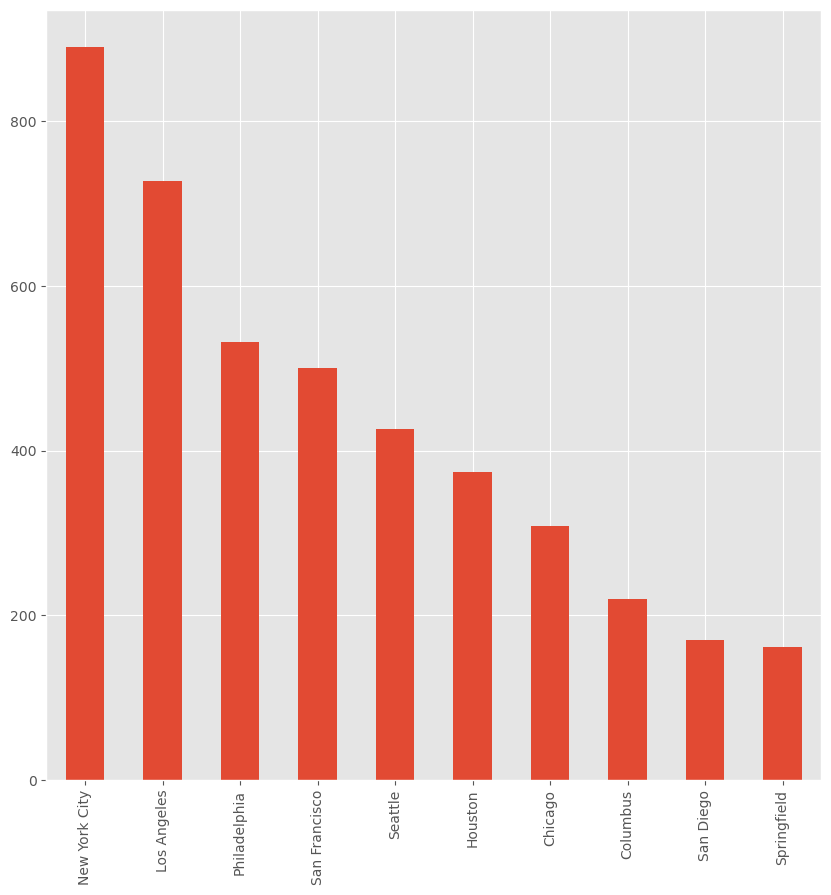

In [28]:
plt.figure(figsize=(10,10))
plt.style.use("ggplot")
count_city= data_super_market.City.value_counts()[0:10]
count_city.plot(kind="bar")

# the top ten city is
         

In [29]:
count_city

New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
Houston          374
Chicago          308
Columbus         220
San Diego        170
Springfield      161
Name: City, dtype: int64

# What is the region with the highest sales?

In [30]:
data_super_market["Region"].value_counts()

West       3140
East       2784
Central    2277
South      1598
Name: Region, dtype: int64

<Axes: xlabel='Region', ylabel='count'>

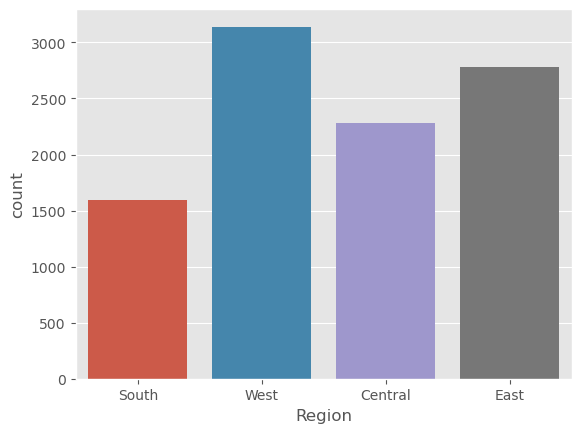

In [31]:
sns.countplot(x=data_super_market["Region"])

# What is the average price of a product in each region?

In [32]:
data_super_market.groupby("Region").mean()["Sales"].round(2)

C:\Users\szeya\AppData\Local\Temp\ipykernel_6484\4242584806.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_super_market.groupby("Region").mean()["Sales"].round(2)


Region
Central    216.36
East       240.39
South      243.52
West       226.18
Name: Sales, dtype: float64

<Axes: xlabel='Region', ylabel='Sales'>

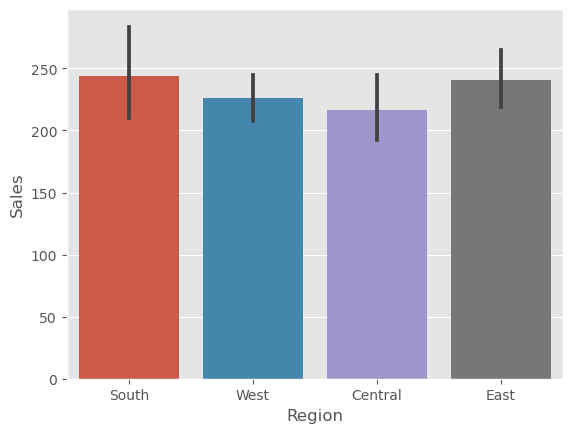

In [33]:
sns.barplot(data=data_super_market , x="Region" , y="Sales")

# the most region have the most total profit

C:\Users\szeya\AppData\Local\Temp\ipykernel_6484\689816538.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_super_market.groupby("Region").sum()["Sales"].round(2).plot(kind="bar")


<Axes: xlabel='Region'>

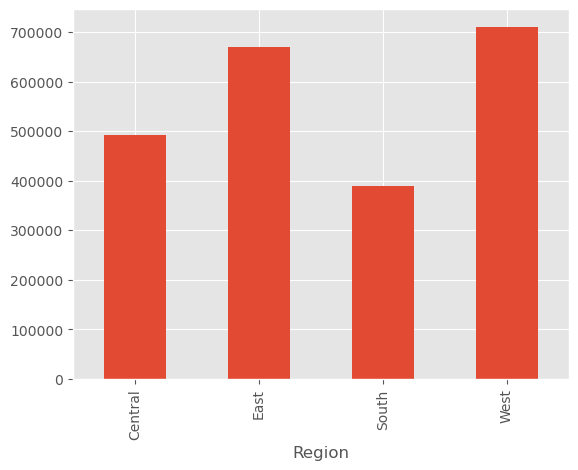

In [34]:
data_super_market.groupby("Region").sum()["Sales"].round(2).plot(kind="bar")

In [35]:
#the most catogry in all region 

In [36]:
pd.pivot_table(data = data_super_market ,index= "Region" ,columns="Category" ,aggfunc={"Category"  :'count'}  )

Category                           
Category Furniture Office Supplies Technology
Region                                       
Central        470            1399        408
East           590            1667        527
South          326             983        289
West           691            1860        589

<Axes: xlabel='Region', ylabel='count'>

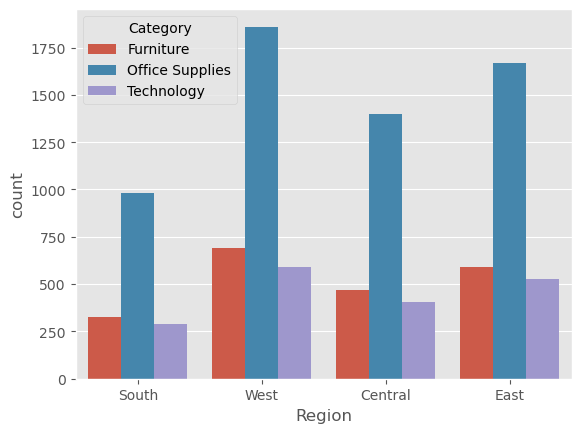

In [37]:
sns.countplot(x=data_super_market.Region , hue = data_super_market.Category)

# from this we can note that :
     the most order in 4 region is 1-office supplices 
                                   2-furniture
                                   3-Tech
     the most order in top 2 is    1-office supplices 
                                   2-furniture

# A- category

In [38]:
pd.DataFrame(data_super_market.Category.value_counts())


Category
Office Supplies      5909
Furniture            2077
Technology           1813

# What is the most Catogry ?

In [39]:
px.bar(x=data_super_market.Category )

# what is the most Category have Profit  ?

the most order is Office


In [40]:
data_super_market.groupby("Category")["Sales"].sum()

Category
Furniture          728377.2037
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64

<Axes: xlabel='Category'>

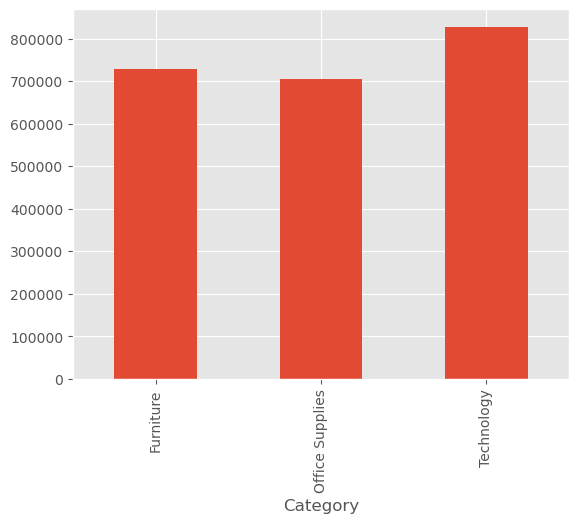

In [41]:
data_super_market.groupby("Category")["Sales"].sum().plot(kind="bar")


([<matplotlib.patches.Wedge at 0x2b106583510>,
 [Text(0.583234631882257, 0.9326507192798216, 'Furniture'),
  Text(-1.0895950718957579, 0.15093899198178853, 'Office Supplies'),
  Text(0.44974183131362755, -1.003858697808942, 'Technology')],
 [Text(0.3181279810266856, 0.5087185741526299, '32.21%'),
  Text(-0.5943245846704133, 0.08233035926279374, '31.20%'),
  Text(0.24531372617106956, -0.5475592897139683, '36.59%')])

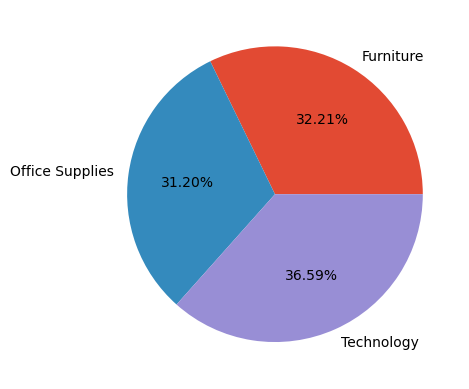

In [42]:
plt.pie(data_super_market.groupby("Category")["Sales"].sum().values ,labels=data_super_market.groupby("Category")["Sales"].sum().index , 
     autopct= "%1.2f%%"  )

# the most category have profit is Technology

# A1-Technology

# types of sub_Cat ["Tech"] ?

In [43]:
tech =data_super_market [data_super_market.Category=="Technology"].copy()

In [44]:
tech["Sub-Category"].value_counts()

Phones         876
Accessories    756
Machines       115
Copiers         66
Name: Sub-Category, dtype: int64

<Axes: xlabel='Sub-Category', ylabel='count'>

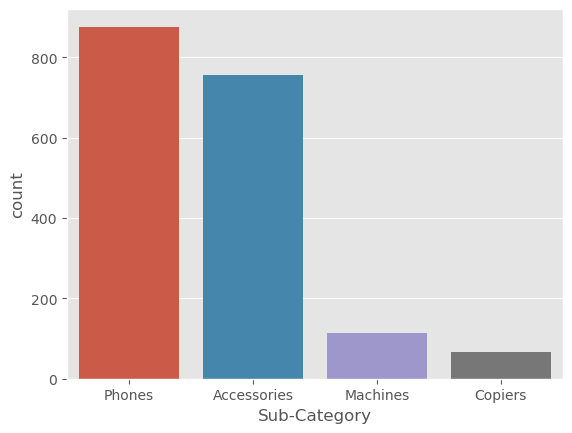

In [45]:
sns.countplot(x=tech["Sub-Category"])

# What is the most sub_cate of "Tech" have profit and show the dist and handle outliers by  SUB_cat ?

<Axes: xlabel='Sub-Category', ylabel='Sales'>

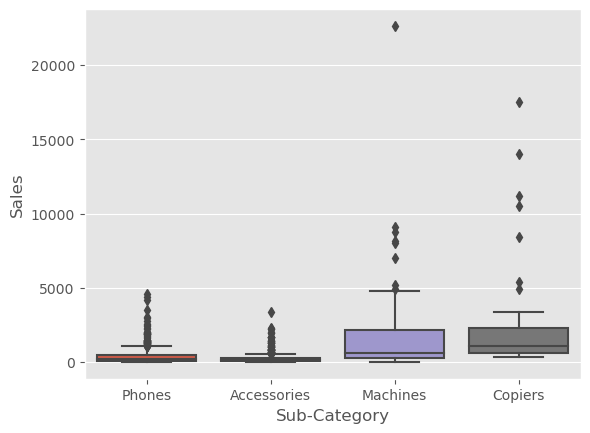

In [46]:
sns.boxplot(x=tech["Sub-Category"] , y = tech["Sales"] )

<Axes: xlabel='Sales', ylabel='Density'>

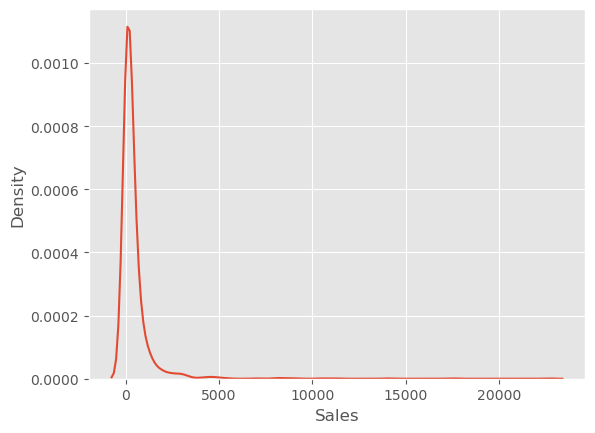

In [47]:
sns.kdeplot(tech["Sales"])

In [48]:
#phones
Q1 =tech[tech["Sub-Category"] =="Phones" ]["Sales"].quantile(.25)
Q3 =tech[tech["Sub-Category"] =="Phones" ]["Sales"].quantile(.75)
IQR=Q3-Q1
low= Q1- (1.5*IQR)
hig= Q3+ (1.5*IQR)

tech.loc[(tech["Sub-Category"] =="Phones")&(tech.Sales >hig),"Sales"] =hig
tech.loc[(tech["Sub-Category"] =="Phones")&(tech.Sales <low),"Sales"] =low

#Accessories
Q1 =tech[tech["Sub-Category"] =="Accessories" ]["Sales"].quantile(.25)
Q3 =tech[tech["Sub-Category"] =="Accessories" ]["Sales"].quantile(.75)
IQR=Q3-Q1
low= Q1- (1.5*IQR)
hig= Q3+ (1.5*IQR)


tech.loc[(tech["Sub-Category"] =="Accessories")&(tech.Sales >hig),"Sales"] =hig
tech.loc[(tech["Sub-Category"] =="Accessories")&(tech.Sales <low),"Sales"] =low

#Machines
Q1 =tech[tech["Sub-Category"] =="Machines" ]["Sales"].quantile(.25)
Q3 =tech[tech["Sub-Category"] =="Machines" ]["Sales"].quantile(.75)
IQR=Q3-Q1
low= Q1- (1.5*IQR)
hig= Q3+ (1.5*IQR)

tech.loc[(tech["Sub-Category"] =="Machines")&(tech.Sales >hig),"Sales"] =hig
tech.loc[(tech["Sub-Category"] =="Machines")&(tech.Sales <low),"Sales"] =low



#Copiers
Q1 =tech[tech["Sub-Category"] =="Copiers" ]["Sales"].quantile(.25)
Q3 =tech[tech["Sub-Category"] =="Copiers" ]["Sales"].quantile(.75)
IQR=Q3-Q1
low= Q1- (1.5*IQR)
hig= Q3+ (1.5*IQR)

tech.loc[(tech["Sub-Category"] =="Copiers")&(tech.Sales >hig),"Sales"] =hig
tech.loc[(tech["Sub-Category"] =="Copiers")&(tech.Sales <low),"Sales"] =low




In [49]:
def Handling_outlier(tech , col , feature) :
        Q1 =tech[tech[col] ==feature ]["Sales"].quantile(.25)
        Q3 =tech[tech[col] ==feature ]["Sales"].quantile(.75)
        IQR=Q3-Q1
        low= Q1- (1.5*IQR)
        hig= Q3+ (1.5*IQR)
        
        tech.loc[(tech[col] ==feature)&(tech.Sales >hig),"Sales"] =hig
        tech.loc[(tech[col] ==feature)&(tech.Sales <low),"Sales"] =low
        return tech[tech[col] == feature]

In [50]:
tech2 = data_super_market[data_super_market.Category =="Technology"]
acc= Handling_outlier(tech2,"Sub-Category" ,"Accessories")
phon = Handling_outlier(tech2,"Sub-Category" ,"Phones")
cop= Handling_outlier(tech2,"Sub-Category" ,"Copiers")
mac = Handling_outlier(tech2,"Sub-Category" ,"Machines")
tech2=pd.concat([ phon ,acc  ,mac, cop ])
tech =tech2

<Axes: xlabel='Sub-Category', ylabel='Sales'>

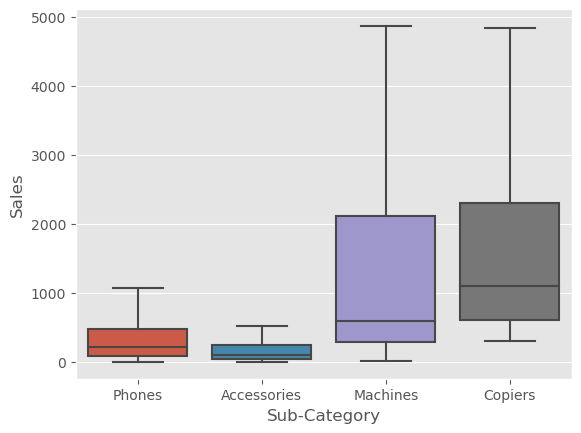

In [51]:
sns.boxplot(x=tech["Sub-Category"] , y = tech["Sales"] )

<Axes: xlabel='Sub-Category', ylabel='Sales'>

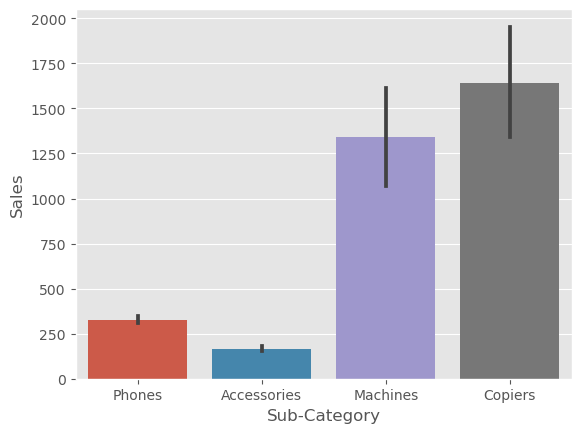

In [52]:
sns.barplot(x=tech["Sub-Category"] , y = tech["Sales"] )

<Axes: xlabel='Sub-Category', ylabel='Sales'>

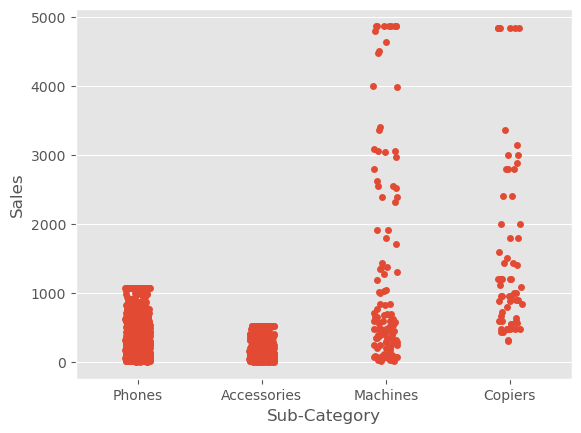

In [53]:
sns.stripplot(x=tech["Sub-Category"] , y = tech["Sales"] )

<Axes: xlabel='Sub-Category'>

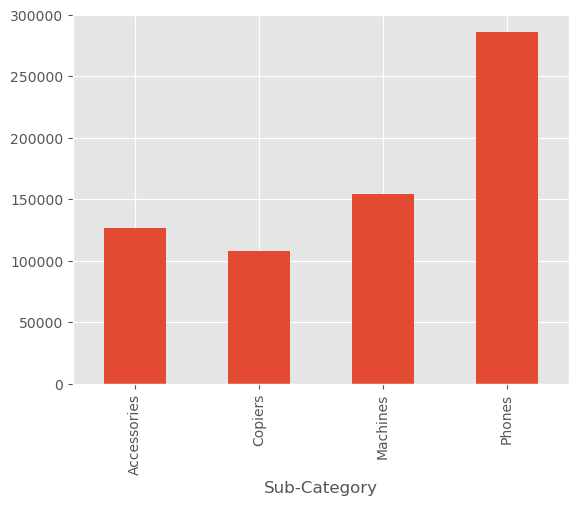

In [54]:
tech.groupby("Sub-Category")["Sales"].sum().plot(kind="bar")

the top mean of Category Tech is copiers , and the most profit is Phones

# find the top top city and region buy Tech?

<Axes: xlabel='Region', ylabel='count'>

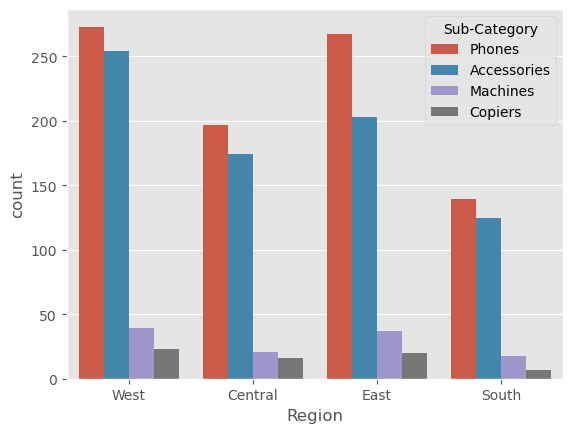

In [55]:
sns.countplot(data=tech ,x= "Region" ,hue='Sub-Category')

In [56]:
pd.crosstab(tech2.Region ,tech2["Sub-Category"],margins=True ,normalize=True).round(3)

Sub-Category  Accessories  Copiers  Machines  Phones    All
Region                                                     
Central             0.096    0.009     0.012   0.109  0.225
East                0.112    0.011     0.020   0.147  0.291
South               0.069    0.004     0.010   0.077  0.159
West                0.140    0.013     0.022   0.151  0.325
All                 0.417    0.036     0.063   0.483  1.000

<Axes: >

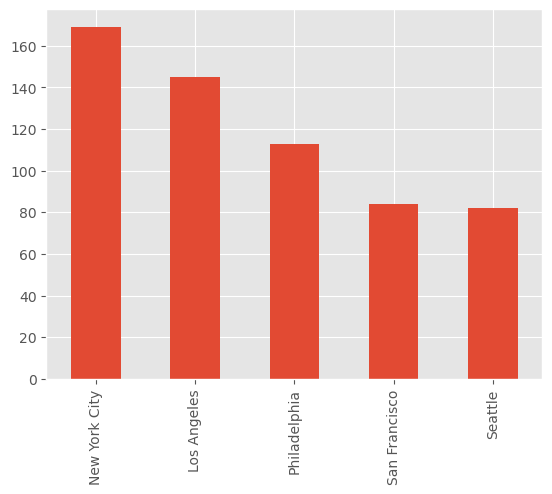

In [57]:
tech.City.value_counts()[0:5].plot(kind ="bar")

top city is NY and top region is west

# find the top Frequancy of all sub_category of Technology


In [58]:
data_super_market.sample()

Ship Date       Ship Mode Customer Name   Segment        Country  \
Order Date                                                                     
2017-12-22 2017-12-28  Standard Class  Duane Noonan  Consumer  United States   

                     City       State  Postal Code Region       Product ID  \
Order Date                                                                   
2017-12-22  Moreno Valley  California      92553.0   West  FUR-FU-10001934   

             Category Sub-Category              Product Name  Sales  year  \
Order Date                                                                  
2017-12-22  Furniture  Furnishings  Magnifier Swing Arm Lamp  41.96  2017   

            month duration  
Order Date                  
2017-12-22     12   6 days

<Axes: >

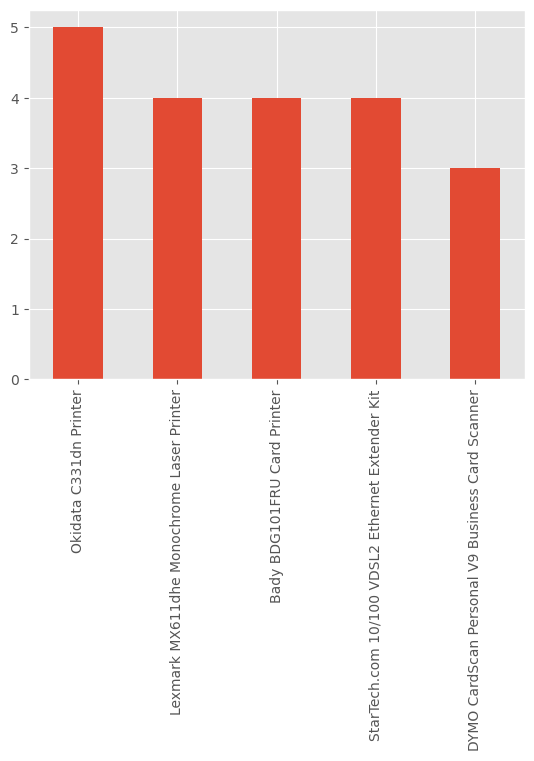

In [59]:
tech [tech["Sub-Category"]=="Machines"]["Product Name"].value_counts()[0:5].plot(kind='bar')

<Axes: >

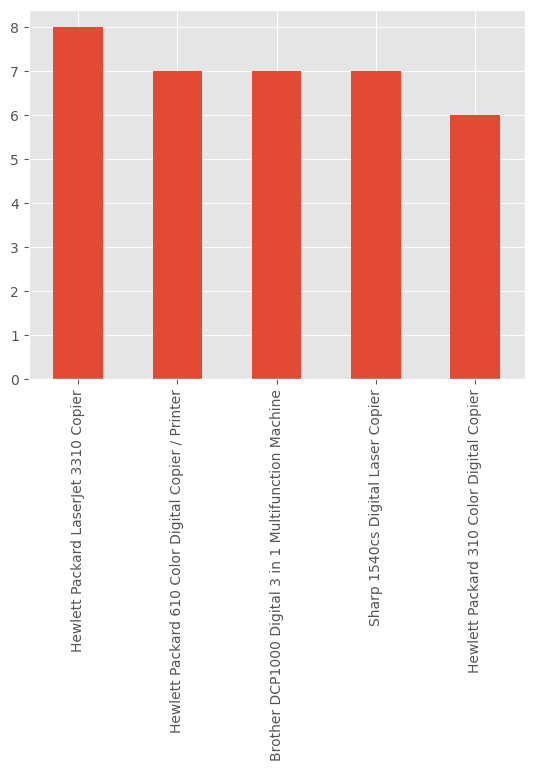

In [60]:
tech [tech["Sub-Category"]=="Copiers"]["Product Name"].value_counts()[0:5].plot(kind='bar')

<Axes: >

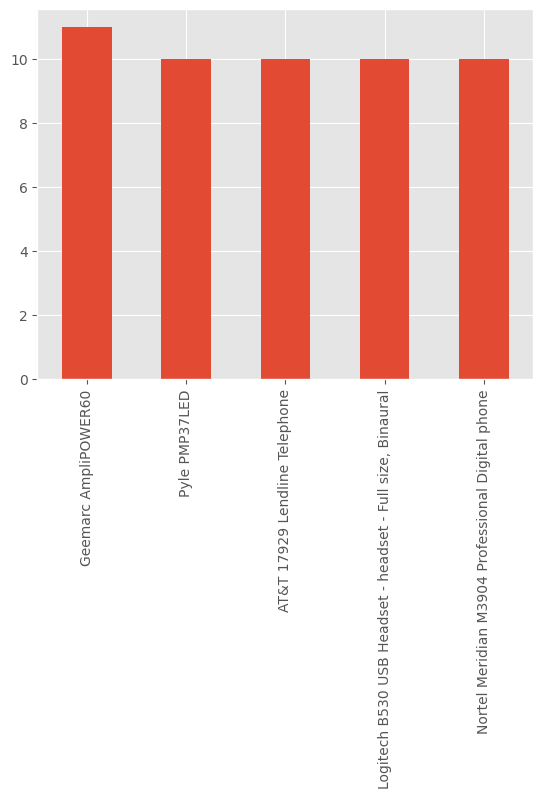

In [61]:

tech [tech["Sub-Category"]=="Phones"]["Product Name"].value_counts()[0:5].plot(kind='bar')


<Axes: >

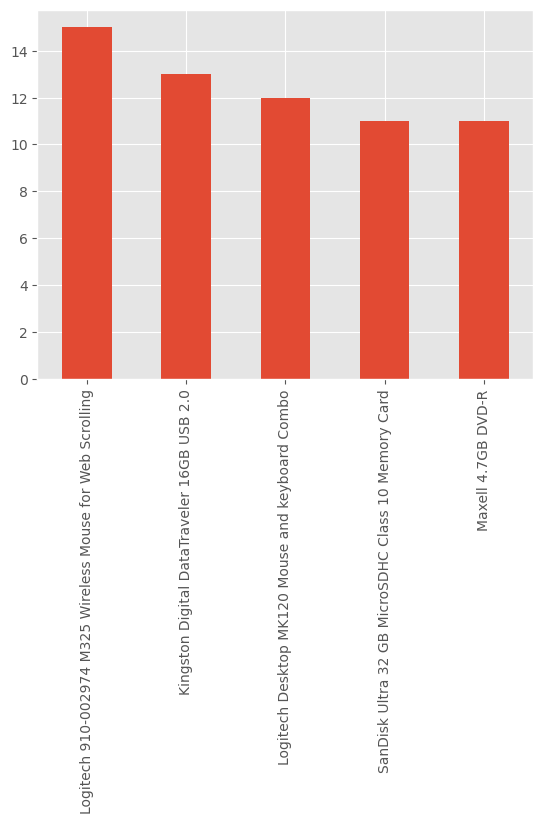

In [62]:
tech [tech["Sub-Category"]=="Accessories"]["Product Name"].value_counts()[0:5].plot(kind='bar')


In [63]:
data_super_market.sample()

Ship Date    Ship Mode     Customer Name    Segment  \
Order Date                                                        
2017-05-05 2017-06-05  First Class  Lindsay Williams  Corporate   

                  Country       City   State  Postal Code Region  \
Order Date                                                         
2017-05-05  United States  Henderson  Nevada      89015.0   West   

                 Product ID   Category Sub-Category  \
Order Date                                            
2017-05-05  FUR-TA-10003392  Furniture       Tables   

                                       Product Name    Sales  year  month  \
Order Date                                                                  
2017-05-05  Global Adaptabilities Conference Tables  1685.88  2017      5   

           duration  
Order Date           
2017-05-05  31 days

# find the top 5 state by Technology

<Axes: xlabel='count', ylabel='State'>

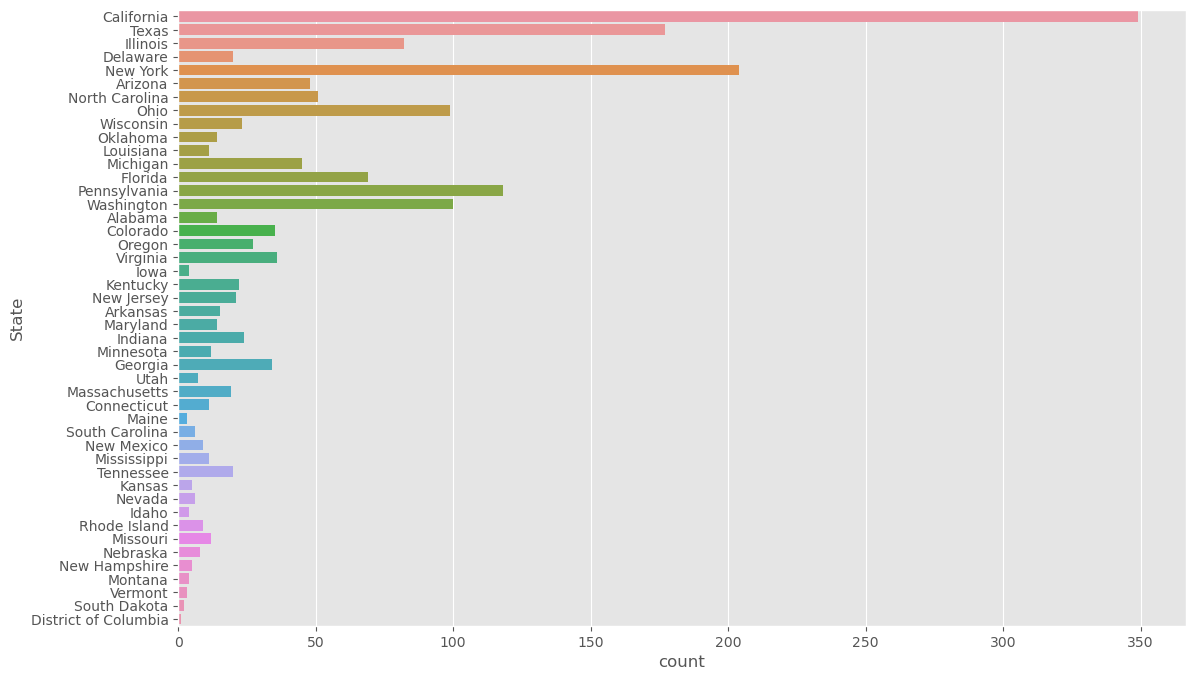

In [64]:
plt.figure(figsize=(13,8))
sns.countplot(y=tech2.State)


# top 5

<Axes: >

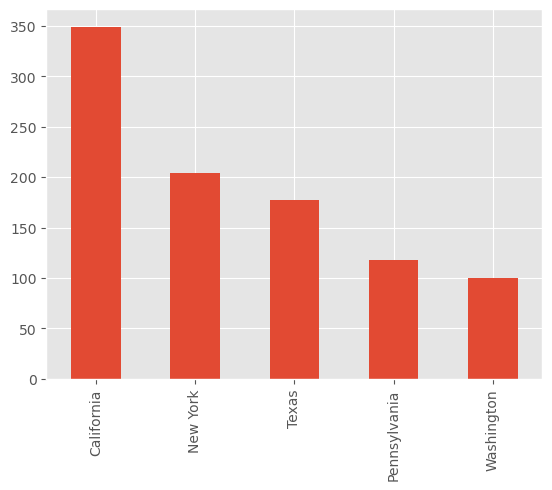

In [65]:
tech.State.value_counts()[0:5].plot(kind= "bar")

# simple time_series analysis
      by year and month 

<Axes: xlabel='Sub-Category', ylabel='Sales'>

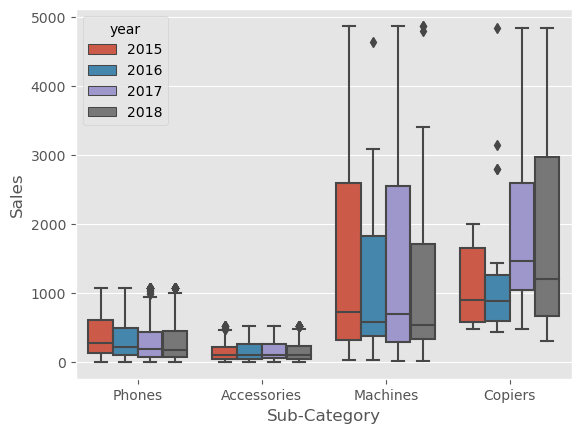

In [66]:
sns.boxplot(data=tech ,x="Sub-Category" , y="Sales" ,hue="year")

In [67]:
tech.year.value_counts()

2018    611
2017    450
2016    405
2015    347
Name: year, dtype: int64

In [68]:
plt.figure(figsize=(8,15))
t= tech.pivot_table(index="month" , columns=["Sub-Category","year"] ,values="Sales" , aggfunc={"Sales" :"sum"},fill_value=0)
t

Sub-Category Accessories                                       Copiers  \
year                2015        2016        2017        2018      2015   
month                                                                    
1             1503.81325   672.09125  1945.29000  2039.42325   659.988   
2             1862.17325  1748.50925   992.32325  3764.01900   479.984   
3              677.26200  2219.56200  2854.52850  5294.59575     0.000   
4             1151.14600  2124.69650  1702.60800  1817.87400     0.000   
5             1997.53400  1496.93200  2575.42525  3090.59325   719.976   
6             1325.69000  1134.83525  1133.40400  3073.47525   559.992   
7             2470.95725  3955.10500  2128.74200  5422.87775     0.000   
8             1644.50800  1574.93000  2914.11125  3466.52900  3549.936   
9             1277.63400  5158.05950  2816.34600  5694.98775  2879.946   
10            1151.31000  1543.84200  2874.28925  2700.89125  1999.960   
11            2970.47125  2909.90925  6210.61625  3672.01525     0.000   
12            3442.84725  4714.19350  3550.70850  4100.78250     0.000   

Sub-Category                                         Machines            \
year                2016        2017         2018        2015      2016   
month                                                                     
1              959.98400  1499.95000   2999.95000      0.0000  1919.976   
2                0.00000  5834.90325      0.00000    559.7100  1818.376   
3             3149.93000     0.00000  12634.78525   7546.6145   482.340   
4             2039.94800  5794.89125      0.00000   4727.9160  1379.920   
5                0.00000  5674.91125      0.00000      0.0000  3372.860   
6             3019.93400   479.98400      0.00000    691.7610     0.000   
7                0.00000  5439.91200   3479.91400    399.5400   287.910   
8             5599.90400     0.00000   5759.89600   5080.4065  7963.776   
9              879.98400     0.00000   1879.96400  13021.1200  3416.800   
10            2269.94200     0.00000   4834.92325    101.9940  1095.794   
11            1679.95000  2799.89600   5734.90525    998.8500   596.873   
12            6514.86725  1999.96000   4379.92200   5708.3785  5429.072   

Sub-Category                             Phones                           \
year               2017       2018         2015         2016        2017   
month                                                                      
1             4870.4365  8295.8290   5206.63925   2566.44200  3846.80125   
2             6233.3365  1304.8440   2871.76400   3251.81400  2754.15125   
3             1141.9380  3813.6980   4330.36725   3184.64050  4478.17400   
4             6906.6865  8069.4215   2939.21325   8457.54850  1461.62200   
5             3326.7760  5213.6365   4836.89125   2458.79800  8095.53450   
6             5271.9850  3404.5000   5225.86650   4334.40400  7586.67650   
7             5103.0250  3059.9820   3833.72400   3456.35800  4548.29400   
8              943.1520     0.0000   3221.18600   7499.97775  8348.84575   
9             1091.7000  1576.5450   6741.38850  10951.57575  4612.27600   
10            3699.5910   695.9790   7236.13575   4033.53725  7625.51250   
11            7890.2500  4051.2030  12692.90050   6177.64400  8548.55725   
12            1289.5090   599.9700   7162.35725   7456.72800  5721.75050   

Sub-Category               
year                 2018  
month                      
1              6582.41250  
2              7436.64850  
3              7540.24600  
4              4046.95725  
5              6633.32325  
6              7014.56325  
7             10847.65375  
8              3834.12525  
9             11709.11425  
10             8449.91975  
11            10244.77175  
12             4259.17000

<Figure size 800x1500 with 0 Axes>

Text(0.5, 1.0, 'Accessories by years')

<Figure size 1500x1500 with 0 Axes>

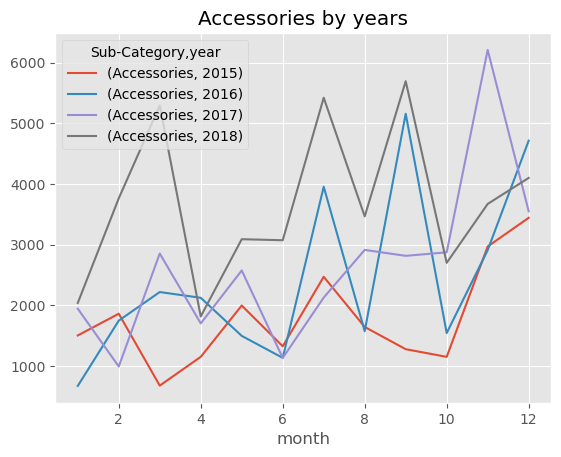

In [69]:
plt.figure(figsize=(15,15))
t.iloc[:,0:4].plot(kind="line")
plt.title("Accessories by years")

Text(0.5, 1.0, 'Accessories by years')

<Figure size 1500x1500 with 0 Axes>

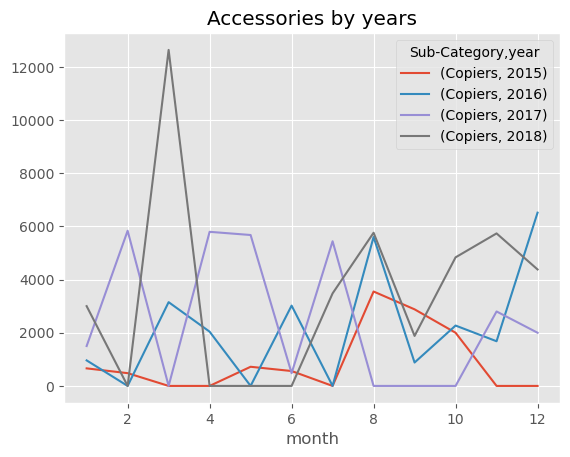

In [70]:
plt.figure(figsize=(15,15))
t.iloc[:,4:8].plot(kind="line")
plt.title("Accessories by years")

Text(0.5, 1.0, 'Accessories by years')

<Figure size 1500x1500 with 0 Axes>

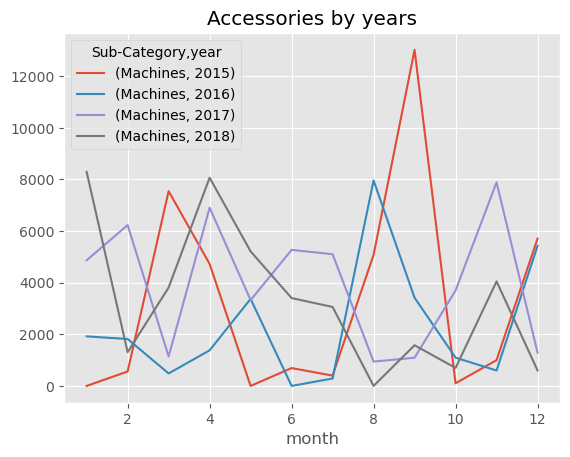

In [71]:
plt.figure(figsize=(15,15))
t.iloc[:,8:12].plot(kind="line")
plt.title("Accessories by years")

# Furniture 

In [72]:
furn = data_super_market[data_super_market.Category =="Furniture" ].copy()
furn 

Ship Date       Ship Mode     Customer Name   Segment  \
Order Date                                                          
2017-08-11 2017-11-11    Second Class       Claire Gute  Consumer   
2017-08-11 2017-11-11    Second Class       Claire Gute  Consumer   
2016-11-10 2016-10-18  Standard Class    Sean O'Donnell  Consumer   
2015-09-06 2015-06-14  Standard Class   Brosina Hoffman  Consumer   
2015-09-06 2015-06-14  Standard Class   Brosina Hoffman  Consumer   
...               ...             ...               ...       ...   
2015-05-11 2015-05-11        Same Day    Barry Gonzalez  Consumer   
2018-03-27 2018-01-04  Standard Class   Caroline Jumper  Consumer   
2018-03-27 2018-01-04  Standard Class   Caroline Jumper  Consumer   
2018-03-27 2018-01-04  Standard Class   Caroline Jumper  Consumer   
2015-05-21 2015-05-23    Second Class  Katherine Hughes  Consumer   

                  Country             City       State  Postal Code   Region  \
Order Date                                                                     
2017-08-11  United States        Henderson    Kentucky      42420.0    South   
2017-08-11  United States        Henderson    Kentucky      42420.0    South   
2016-11-10  United States  Fort Lauderdale     Florida      33311.0    South   
2015-09-06  United States      Los Angeles  California      90032.0     West   
2015-09-06  United States      Los Angeles  California      90032.0     West   
...                   ...              ...         ...          ...      ...   
2015-05-11  United States          Hampton    Virginia      23666.0    South   
2018-03-27  United States          Houston       Texas      77070.0  Central   
2018-03-27  United States          Houston       Texas      77070.0  Central   
2018-03-27  United States          Houston       Texas      77070.0  Central   
2015-05-21  United States          Houston       Texas      77070.0  Central   

                 Product ID   Category Sub-Category  \
Order Date                                            
2017-08-11  FUR-BO-10001798  Furniture    Bookcases   
2017-08-11  FUR-CH-10000454  Furniture       Chairs   
2016-11-10  FUR-TA-10000577  Furniture       Tables   
2015-09-06  FUR-FU-10001487  Furniture  Furnishings   
2015-09-06  FUR-TA-10001539  Furniture       Tables   
...                     ...        ...          ...   
2015-05-11  FUR-CH-10004754  Furniture       Chairs   
2018-03-27  FUR-BO-10001811  Furniture    Bookcases   
2018-03-27  FUR-CH-10004063  Furniture       Chairs   
2018-03-27  FUR-CH-10001714  Furniture       Chairs   
2015-05-21  FUR-CH-10003396  Furniture       Chairs   

                                                 Product Name      Sales  \
Order Date                                                                 
2017-08-11                  Bush Somerset Collection Bookcase   261.9600   
2017-08-11  Hon Deluxe Fabric Upholstered Stacking Chairs,...   731.9400   
2016-11-10      Bretford CR4500 Series Slim Rectangular Table   957.5775   
2015-09-06  Eldon Expressions Wood and Plastic Desk Access...    48.8600   
2015-09-06           Chromcraft Rectangular Conference Tables  1706.1840   
...                                                       ...        ...   
2015-05-11                Global Stack Chair with Arms, Black   149.9000   
2018-03-27  Atlantic Metals Mobile 5-Shelf Bookcases, Cust...  1023.3320   
2018-03-27            Global Deluxe High-Back Manager's Chair   600.5580   
2018-03-27     Global Leather & Oak Executive Chair, Burgundy   211.2460   
2015-05-21                          Global Deluxe Steno Chair   107.7720   

            year  month duration  
Order Date                        
2017-08-11  2017      8  92 days  
2017-08-11  2017      8  92 days  
2016-11-10  2016     11 -23 days  
2015-09-06  2015      9 -84 days  
2015-09-06  2015      9 -84 days  
...          ...    ...      ...  
2015-05-11  2015      5   0 days  
2018-03-27  2018      3 -82 days  
2018-03-27  2018  

<Axes: xlabel='Sub-Category', ylabel='count'>

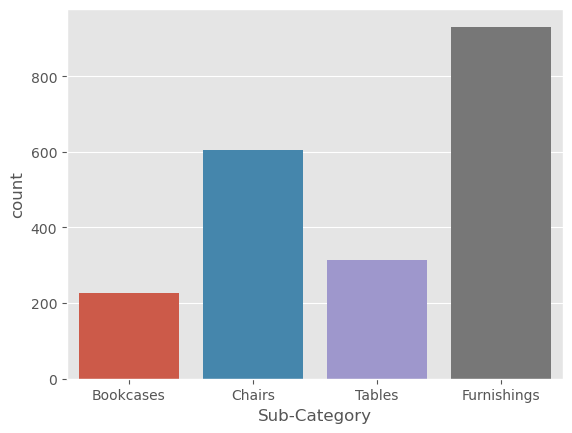

In [73]:
sns.countplot(x=furn["Sub-Category"])

In [74]:
furn["Sub-Category"].value_counts()

Furnishings    931
Chairs         606
Tables         314
Bookcases      226
Name: Sub-Category, dtype: int64

In [75]:
furn.groupby("Sub-Category")["Sales"].sum()

Sub-Category
Bookcases      113813.1987
Chairs         322541.3590
Furnishings     89212.0180
Tables         202810.6280
Name: Sales, dtype: float64

<Axes: xlabel='Sub-Category'>

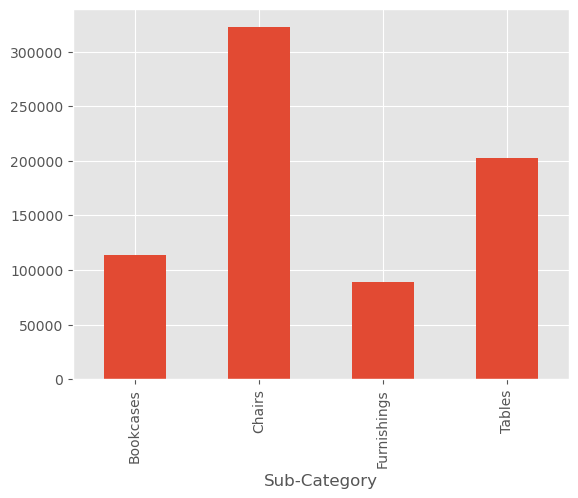

In [76]:
furn.groupby("Sub-Category")["Sales"].sum().plot(kind="bar")

we can see that the most profit from Chairs The most requested is Furnishings    

# What is the most sub_cate of "Furn" have profit and show the dist and handle outliers by  SUB_cat ?

<Axes: xlabel='Sub-Category', ylabel='Sales'>

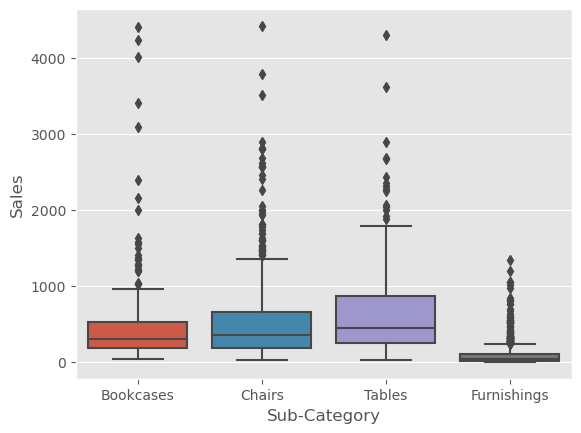

In [77]:
sns.boxplot(data=furn ,x="Sub-Category" , y="Sales")

In [78]:
Bookcases=Handling_outlier(furn ,"Sub-Category" ,"Bookcases")
chairs= Handling_outlier(furn ,"Sub-Category" ,"Chairs")
Furnishings =Handling_outlier(furn ,"Sub-Category" ,"Furnishings")
Tables =Handling_outlier(furn ,"Sub-Category" ,"Tables")
furn =pd.concat([Bookcases ,chairs ,Tables ,Furnishings ] ,ignore_index=True )

<Axes: xlabel='Sub-Category', ylabel='Sales'>

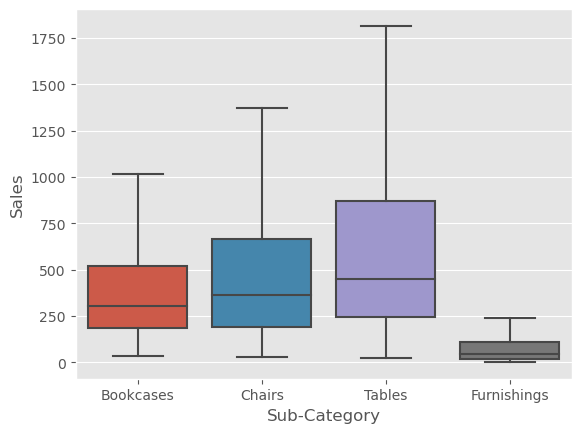

In [79]:
sns.boxplot(data=furn ,x="Sub-Category" , y="Sales")

<Axes: xlabel='Sub-Category', ylabel='Sales'>

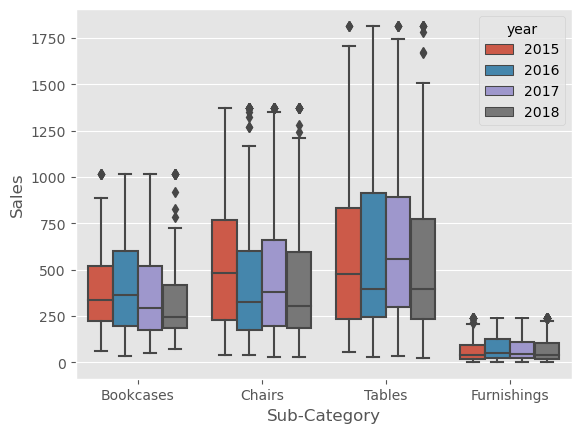

In [80]:
sns.boxplot(data=furn ,x="Sub-Category" , y="Sales" ,hue="year")

<Axes: xlabel='Sub-Category', ylabel='Sales'>

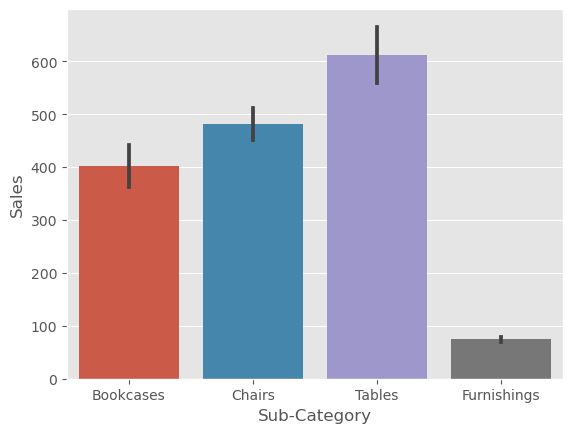

In [81]:
sns.barplot(x=furn["Sub-Category"] , y = furn["Sales"] )

It is clear from those graphs that the average profit from Tables is the highest

# find the top five city and region buy furn?

In [82]:
furn["City"].value_counts()[0:5]

New York City    187
Los Angeles      151
Philadelphia     111
San Francisco     99
Seattle           96
Name: City, dtype: int64

<Axes: >

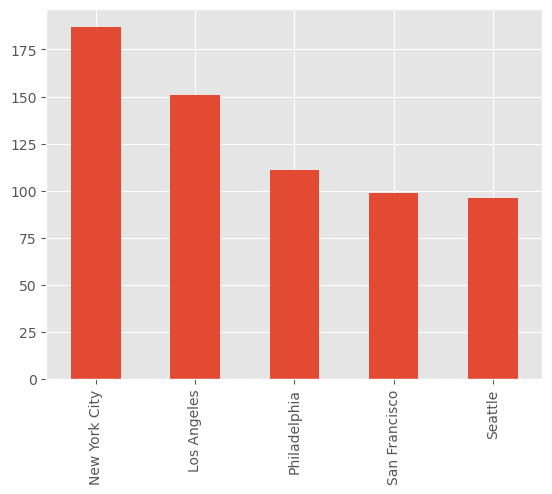

In [83]:
furn["City"].value_counts()[0:5].plot(kind="bar")

<Axes: >

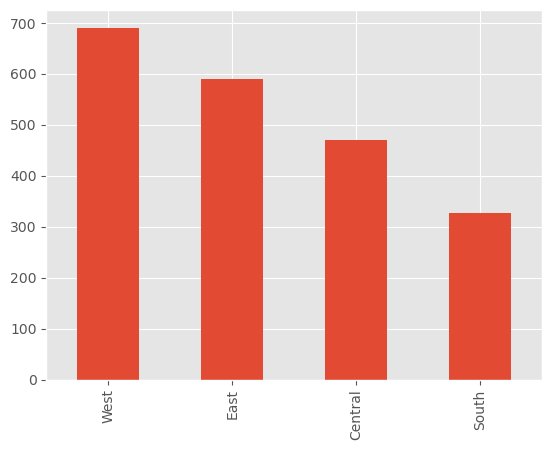

In [84]:
furn.Region.value_counts().plot(kind="bar")

# you can see the top Five city and region

In [85]:
pd.crosstab(furn.Region ,furn["Sub-Category"],margins=True ,normalize=True).round(3)

Sub-Category  Bookcases  Chairs  Furnishings  Tables    All
Region                                                     
Central           0.024   0.073        0.095   0.035  0.226
East              0.034   0.080        0.132   0.038  0.284
South             0.013   0.041        0.078   0.024  0.157
West              0.038   0.098        0.143   0.054  0.333
All               0.109   0.292        0.448   0.151  1.000

<Axes: xlabel='Region', ylabel='count'>

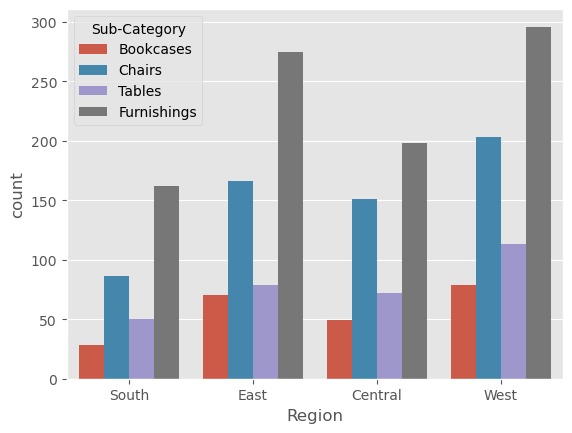

In [86]:
sns.countplot(data=furn ,x= "Region" ,hue='Sub-Category')

# find the top Frequancy of all sub_category of furn


<Axes: >

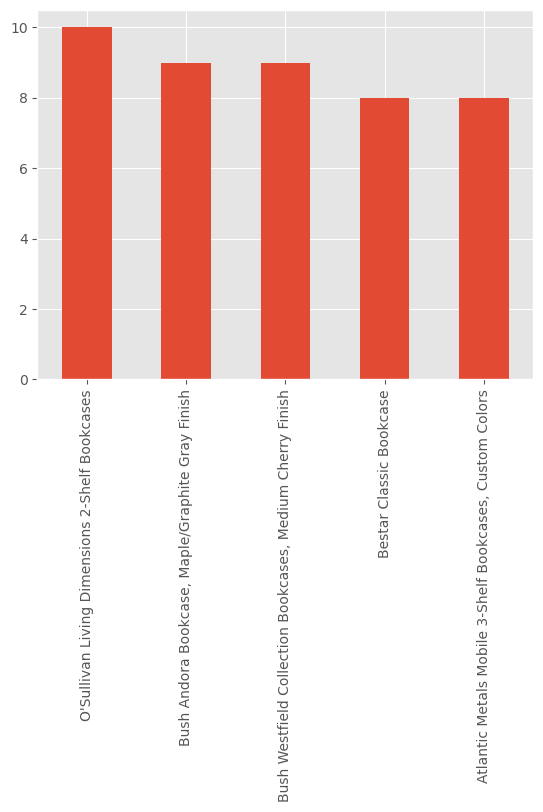

In [87]:
furn [furn["Sub-Category"]=="Bookcases"]["Product Name"].value_counts()[0:5].plot(kind='bar')

<Axes: >

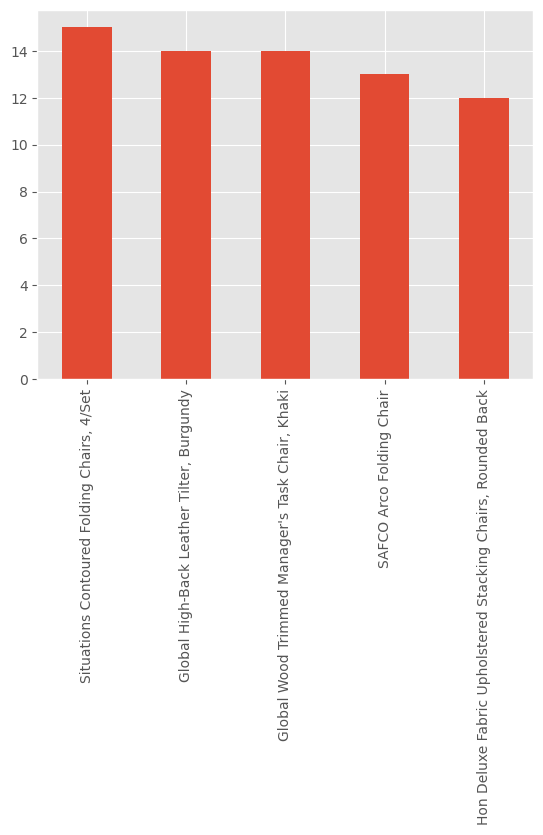

In [88]:
furn [furn["Sub-Category"]=="Chairs"]["Product Name"].value_counts()[0:5].plot(kind='bar')

<Axes: >

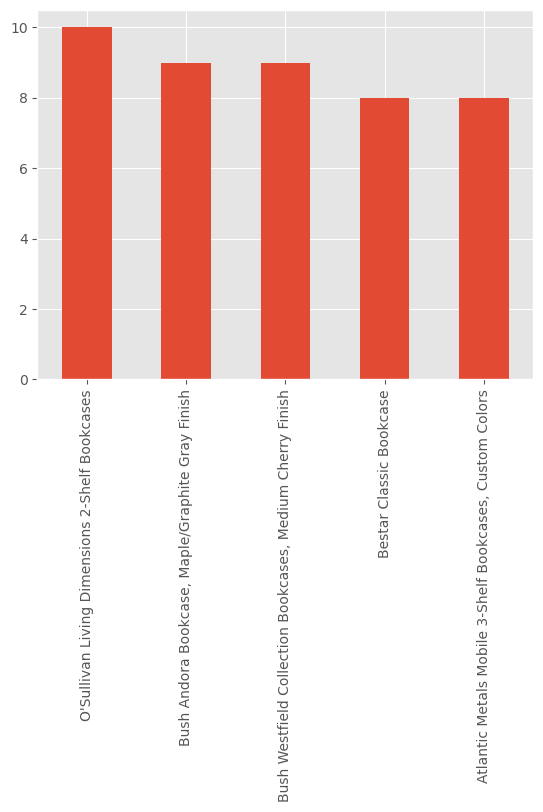

In [89]:
furn [furn["Sub-Category"]=="Bookcases"]["Product Name"].value_counts()[0:5].plot(kind='bar')

<Axes: >

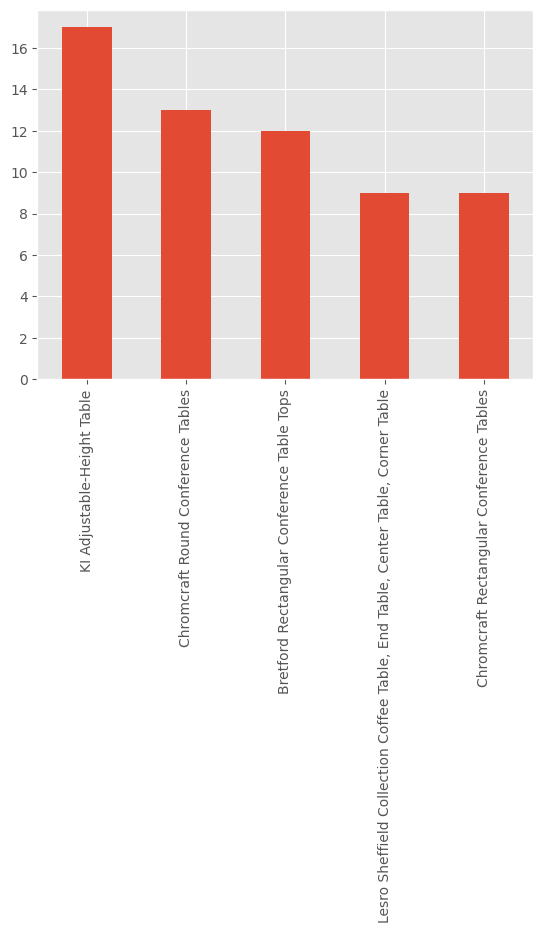

In [90]:
    furn [furn["Sub-Category"]=="Tables"]["Product Name"].value_counts()[0:5].plot(kind='bar')

# find the top 5 state by furn

<Axes: xlabel='count', ylabel='State'>

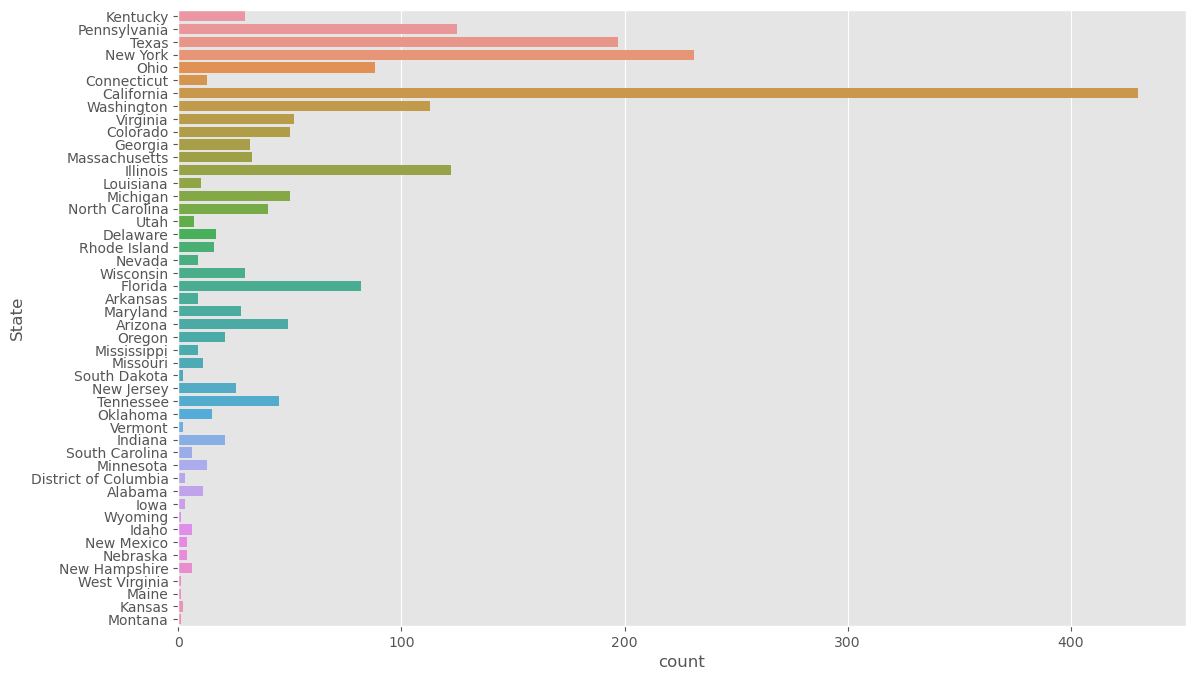

In [91]:
plt.figure(figsize=(13,8))
sns.countplot(y=furn.State)


# simple time Series

In [92]:
plt.figure(figsize=(8,15))
t= furn.pivot_table(index="month" , columns=["Sub-Category","year"] ,values="Sales" , aggfunc={"Sales" :"sum"},fill_value=0)
t

Sub-Category    Bookcases                                         \
year                 2015         2016         2017         2018   
month                                                              
1             1010.055000  1018.730125   499.716000  1236.896000   
2              883.920000   964.949000   955.804000  1223.062400   
3             1526.846125  2035.403125  1664.421000  2146.236925   
4              353.568000   523.260000  1413.013125  2321.013600   
5              290.666000  2651.962625  1278.584800  1974.247525   
6              406.005600  1438.019200  2933.481125  4251.212500   
7             1018.730125  2558.424000  1261.486000  1832.506125   
8              794.276000  3745.934250  4185.037050  2628.360250   
9             2736.968800  4046.254375  3377.419300  2759.415125   
10             966.963000   787.793000  1870.002125  1803.192200   
11            3976.794750  2846.190000  1848.756125  2507.086000   
12            1992.156825  3748.655200   141.372000  2343.509925   

Sub-Category        Chairs                                           \
year                  2015         2016          2017          2018   
month                                                                 
1              7392.802250  5271.325375   4372.660000   6508.608125   
2               239.840000  2933.151125   3481.559125   7986.370000   
3              3672.855000  5062.723125   8008.549000   5513.385250   
4              3538.151125  4882.685000   5340.386000   2891.790000   
5              2956.439000  6888.480250   7387.616250   4772.925000   
6              5547.322125  3072.952000   2422.444000   6368.122000   
7              7016.552000  6233.517125   5642.157125   5686.939125   
8              5831.307125  2894.492000   6352.379125   5250.717125   
9              4559.449000  8204.095375   8239.057000  11248.123250   
10             7120.167375  5499.279125   5860.461250   4301.610000   
11             8312.046000  7327.160000   6442.711125  12557.876250   
12            13314.341375  4188.132000  13250.605375  10202.176250   

Sub-Category Furnishings                                        Tables  \
year                2015       2016       2017       2018         2015   
month                                                                    
1               797.3345  1269.3375  1144.9490  1263.2310   709.509000   
2               615.5700   267.8320   913.1205  1261.9425     0.000000   
3               678.8445  1636.1755  1285.4750  1763.7785  7790.241000   
4               753.7985  1433.4170  1723.4885  1800.1785  1719.418000   
5              1091.1290   947.8265  2191.3500  1729.8760  1411.805000   
6               320.2080  2204.7280  1059.5285  1130.0230  2924.256000   
7              1100.2545   512.8600  1586.3315  1704.8895  1958.856000   
8               850.3450  1408.0070  1520.6625  2551.3295  4220.200500   
9              1515.5385  1339.7685  1916.2755  1841.2115  6594.989125   
10              771.5585   458.0040  1800.4670  1723.0415  4435.400000   
11             1881.2070  3013.9120  1414.2370  3350.2345  3643.235000   
12             1732.9465  1542.2035  2725.8360  1764.8485  7591.170250   

Sub-Category                                         
year                2016          2017         2018  
month                                                
1             5039.67425   3025.428000  3711.999125  
2             2633.33400   1728.141000  4955.274125  
3              171.96000   5868.381000  5215.118000  
4             1965.26750   2770.703000  4673.642000  
5                0.00000   7118.976125   544.140000  
6              796.42500   3268.680000  4616.939125  
7             2595.12300   2678.278125  3905.681500  
8             1306.63000   6408.295125  6800.367000  
9             5673.24400   3734.767000  2656.322000  
10            2785.37700   3167.418000  9714.717125  
11            5367.63500   7025.427125  6894.699125  
12            4481.78200  10768.272625  5323.2

<Figure size 800x1500 with 0 Axes>

Text(0.5, 1.0, 'Bookcases by years')

<Figure size 1500x1500 with 0 Axes>

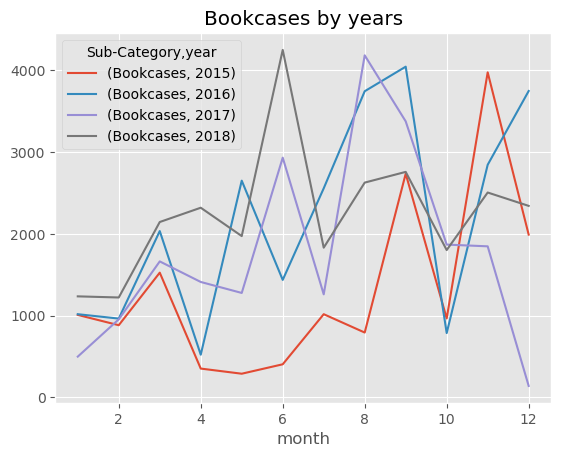

In [93]:
plt.figure(figsize=(15,15))
t.iloc[:,0:4].plot(kind="line")
plt.title("Bookcases by years")

Text(0.5, 1.0, 'Chairs by years')

<Figure size 1500x1500 with 0 Axes>

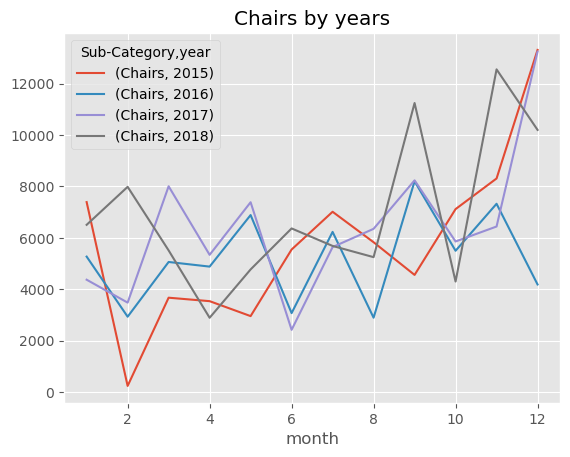

In [94]:
plt.figure(figsize=(15,15))
t.iloc[:,4:8].plot(kind="line")
plt.title("Chairs by years")

Text(0.5, 1.0, 'Furnishings by years')

<Figure size 1500x1500 with 0 Axes>

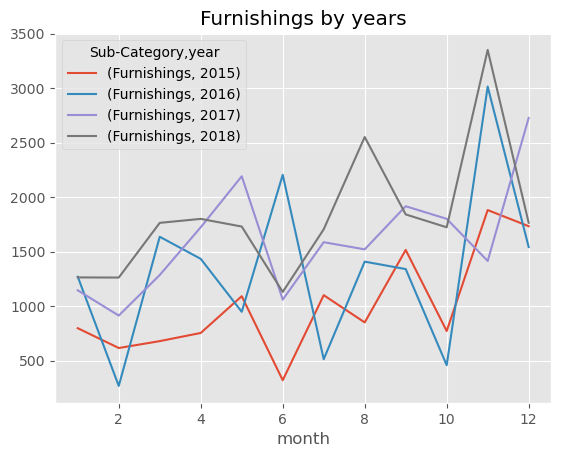

In [95]:
plt.figure(figsize=(15,15))
t.iloc[:,8:12].plot(kind="line")
plt.title("Furnishings by years")

Text(0.5, 1.0, 'Tables by years')

<Figure size 1500x1500 with 0 Axes>

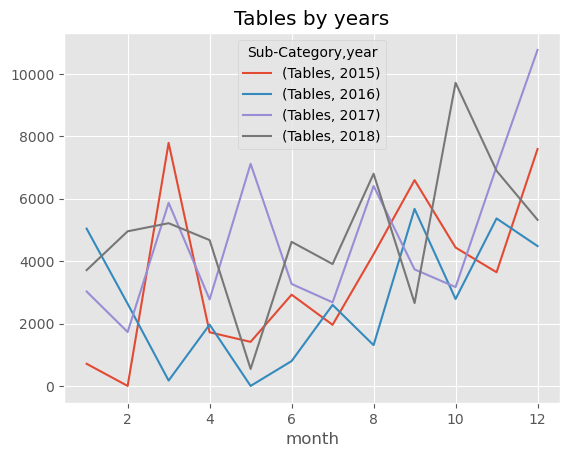

In [96]:
plt.figure(figsize=(15,15))
t.iloc[:,12:16].plot(kind="line")
plt.title("Tables by years")

<Axes: xlabel='Sub-Category', ylabel='Sales'>

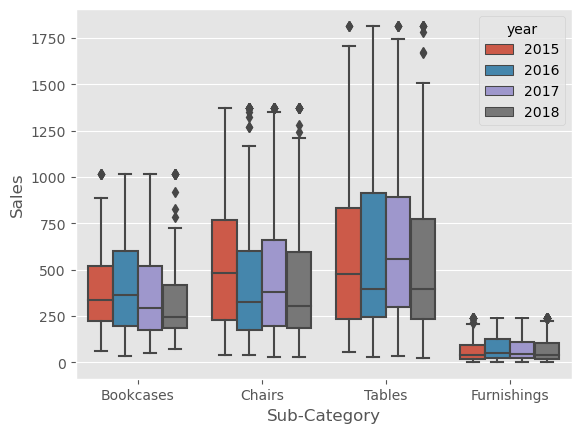

In [97]:
sns.boxplot(data=furn ,x="Sub-Category" , y="Sales" ,hue="year")

# C- office

In [98]:
off = data_super_market[data_super_market.Category =="Office Supplies" ].copy()
off 

Ship Date       Ship Mode     Customer Name    Segment  \
Order Date                                                           
2017-12-06 2017-06-16    Second Class   Darrin Van Huff  Corporate   
2016-11-10 2016-10-18  Standard Class    Sean O'Donnell   Consumer   
2015-09-06 2015-06-14  Standard Class   Brosina Hoffman   Consumer   
2015-09-06 2015-06-14  Standard Class   Brosina Hoffman   Consumer   
2015-09-06 2015-06-14  Standard Class   Brosina Hoffman   Consumer   
...               ...             ...               ...        ...   
2015-05-21 2015-05-23    Second Class  Katherine Hughes   Consumer   
2015-05-21 2015-05-23    Second Class  Katherine Hughes   Consumer   
2015-05-21 2015-05-23    Second Class  Katherine Hughes   Consumer   
2017-05-21 2017-05-28  Standard Class     Sally Hughsby  Corporate   
2016-12-01 2016-01-17  Standard Class  Cindy Schnelling  Corporate   

                  Country             City       State  Postal Code   Region  \
Order Date                                                                     
2017-12-06  United States      Los Angeles  California      90036.0     West   
2016-11-10  United States  Fort Lauderdale     Florida      33311.0    South   
2015-09-06  United States      Los Angeles  California      90032.0     West   
2015-09-06  United States      Los Angeles  California      90032.0     West   
2015-09-06  United States      Los Angeles  California      90032.0     West   
...                   ...              ...         ...          ...      ...   
2015-05-21  United States          Houston       Texas      77070.0  Central   
2015-05-21  United States          Houston       Texas      77070.0  Central   
2015-05-21  United States          Houston       Texas      77070.0  Central   
2017-05-21  United States          Chicago    Illinois      60610.0  Central   
2016-12-01  United States           Toledo        Ohio      43615.0     East   

                 Product ID         Category Sub-Category  \
Order Date                                                  
2017-12-06  OFF-LA-10000240  Office Supplies       Labels   
2016-11-10  OFF-ST-10000760  Office Supplies      Storage   
2015-09-06  OFF-AR-10002833  Office Supplies          Art   
2015-09-06  OFF-BI-10003910  Office Supplies      Binders   
2015-09-06  OFF-AP-10002892  Office Supplies   Appliances   
...                     ...              ...          ...   
2015-05-21  OFF-EN-10003134  Office Supplies    Envelopes   
2015-05-21  OFF-PA-10001560  Office Supplies        Paper   
2015-05-21  OFF-BI-10000977  Office Supplies      Binders   
2017-05-21  OFF-BI-10003429  Office Supplies      Binders   
2016-12-01  OFF-AR-10001374  Office Supplies          Art   

                                                 Product Name    Sales  year  \
Order Date                                                                     
2017-12-06  Self-Adhesive Address Labels for Typewriters b...   14.620  2017   
2016-11-10                     Eldon Fold 'N Roll Cart System   22.368  2016   
2015-09-06                                         Newell 322    7.280  2015   
2015-09-06  DXL Angle-View Binders with Locking Rings by S...   18.504  2015   
2015-09-06                   Belkin F5C206VTEL 6 Outlet Surge  114.900  2015   
...                                                       ...      ...   ...   
2015-05-21                                    Staple envelope   56.064  2015   
2015-05-21        Adams Telephone Message Books, 5 1/4” x 11”    4.832  2015   
2015-05-21                 Ibico Plastic Spiral Binding Combs   18.240  2015   
2017-05-21  Cardinal HOLDit! Binder Insert Strips,Extra St...    3.798  2017   
2016-12-01           BIC Brite Liner Highlighters, Chisel Tip   10.368  2016   

            month  duration  
Order Date                   
2017-12-06     12 -173 days  
2016-11-10     11  -23 days  
2015-09-06      9  -84 days  
2015-09-06      9  -84 days  
2015-09-06      9  -84 days  
...           .

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Labels'),
  Text(1, 0, 'Storage'),
  Text(2, 0, 'Art'),
  Text(3, 0, 'Binders'),
  Text(4, 0, 'Appliances'),
  Text(5, 0, 'Paper'),
  Text(6, 0, 'Envelopes'),
  Text(7, 0, 'Fasteners'),
  Text(8, 0, 'Supplies')])

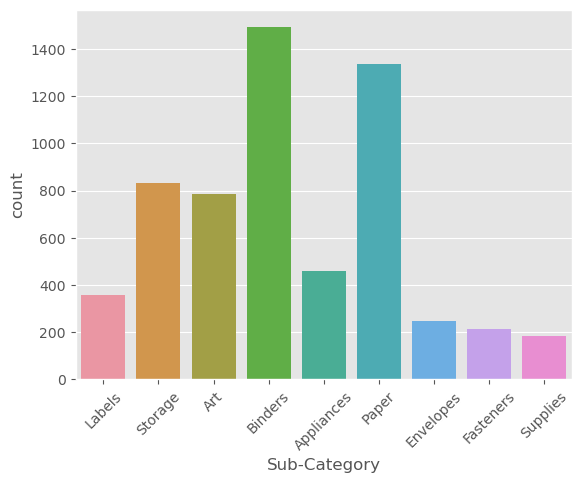

In [99]:
sns.countplot(x=off["Sub-Category"])
plt.xticks(rotation=45)

In [100]:
off["Sub-Category"].value_counts()

Binders       1492
Paper         1338
Storage        832
Art            785
Appliances     459
Labels         357
Envelopes      248
Fasteners      214
Supplies       184
Name: Sub-Category, dtype: int64

In [101]:
off.groupby("Sub-Category")["Sales"].sum()

Sub-Category
Appliances    104618.403
Art            26705.410
Binders       200028.785
Envelopes      16128.046
Fasteners       3001.960
Labels         12347.726
Paper          76828.304
Storage       219343.392
Supplies       46420.308
Name: Sales, dtype: float64

<Axes: xlabel='Sub-Category'>

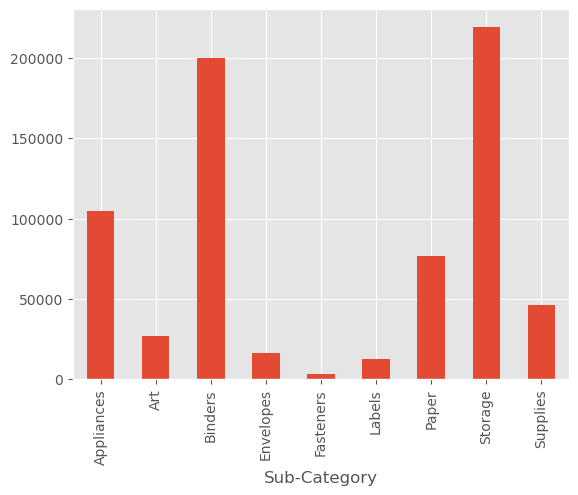

In [102]:
off.groupby("Sub-Category")["Sales"].sum().plot(kind="bar")

# What is the most sub_cate of "office" have profit and show the dist and handle outliers by  SUB_cat ?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Labels'),
  Text(1, 0, 'Storage'),
  Text(2, 0, 'Art'),
  Text(3, 0, 'Binders'),
  Text(4, 0, 'Appliances'),
  Text(5, 0, 'Paper'),
  Text(6, 0, 'Envelopes'),
  Text(7, 0, 'Fasteners'),
  Text(8, 0, 'Supplies')])

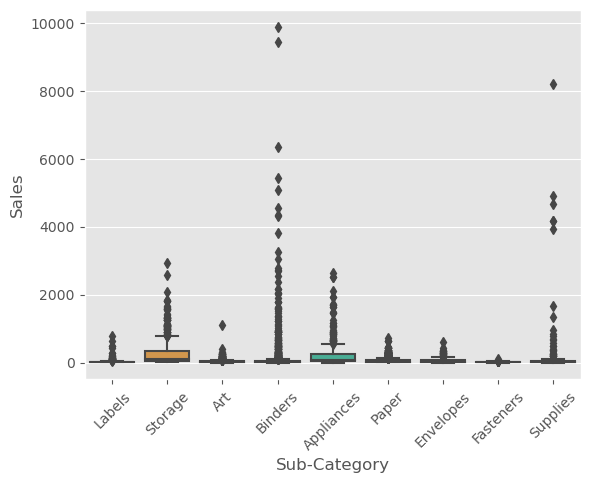

In [103]:
sns.boxplot(data=off ,x="Sub-Category" , y="Sales")
plt.xticks(rotation=45)

In [104]:
Labels=Handling_outlier(off ,"Sub-Category" ,"Labels")
Storage=Handling_outlier(off ,"Sub-Category" ,"Storage")
Art=Handling_outlier(off ,"Sub-Category" ,"Art")
Appliances=Handling_outlier(off ,"Sub-Category" ,"Appliances")
Binders=Handling_outlier(off ,"Sub-Category" ,"Binders")

Paper=Handling_outlier(off ,"Sub-Category" ,"Paper")
Envelopes=Handling_outlier(off ,"Sub-Category" ,"Envelopes")
Supplies=Handling_outlier(off ,"Sub-Category" ,"Supplies")
off =pd.concat([Labels,Storage,Art,Appliances,Binders,Paper,Envelopes,Supplies],ignore_index=True )

<Axes: xlabel='Sub-Category', ylabel='Sales'>

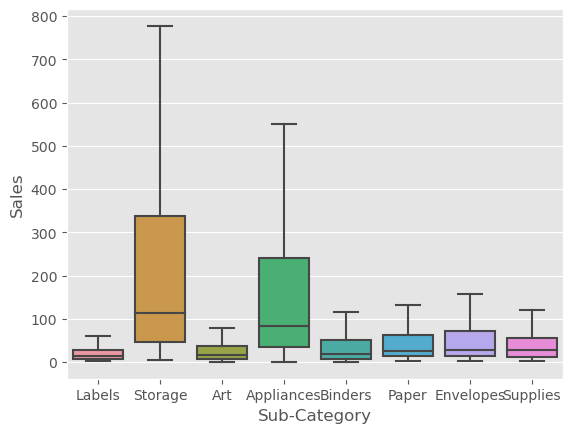

In [105]:
sns.boxplot(data=off ,x="Sub-Category" , y="Sales")

<Axes: xlabel='Sub-Category', ylabel='Sales'>

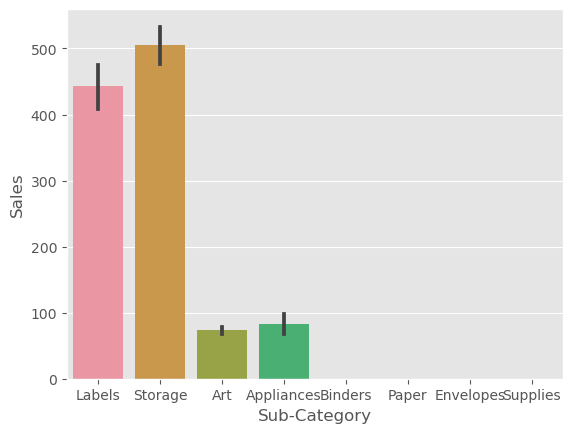

In [106]:
sns.barplot(x=off["Sub-Category"] , y = furn["Sales"] )

It is clear from those graphs that the average profit from Storage is the highest

# find the top five city and region buy furn?

In [107]:
off["City"].value_counts()[0:5]

New York City    518
Los Angeles      418
San Francisco    311
Philadelphia     294
Seattle          236
Name: City, dtype: int64

<Axes: >

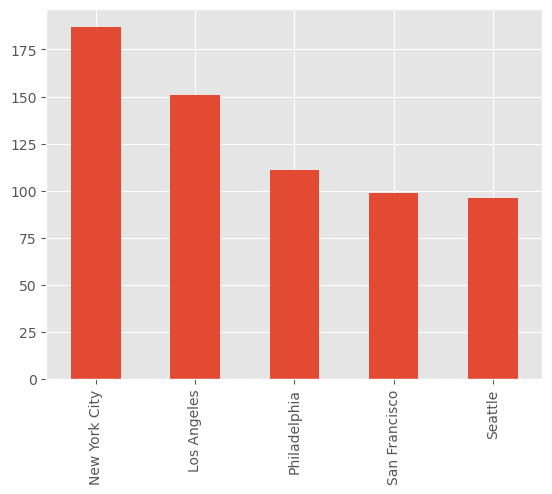

In [108]:
furn["City"].value_counts()[0:5].plot(kind="bar")

<Axes: >

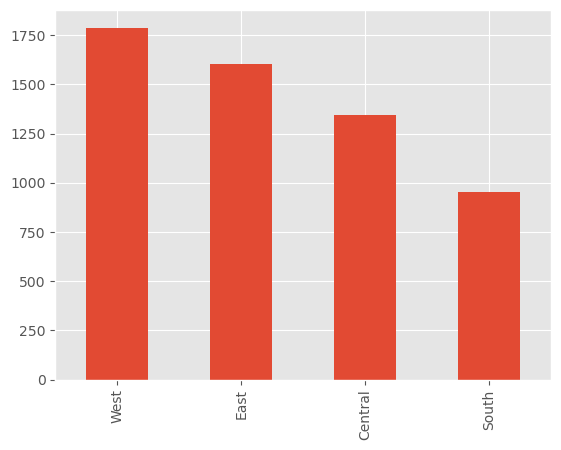

In [109]:
off.Region.value_counts().plot(kind="bar")

 you can see the top Five city and region

In [110]:
pd.crosstab(off.Region ,off["Sub-Category"],margins=True ,normalize=True).round(3)

Sub-Category  Appliances    Art  Binders  Envelopes  Labels  Paper  Storage  \
Region                                                                        
Central            0.021  0.031    0.064      0.010   0.013  0.055    0.036   
East               0.022  0.040    0.075      0.012   0.018  0.064    0.042   
South              0.014  0.025    0.042      0.009   0.011  0.038    0.022   
West               0.023  0.043    0.081      0.012   0.020  0.077    0.046   
All                0.081  0.138    0.262      0.044   0.063  0.235    0.146   

Sub-Category  Supplies    All  
Region                         
Central          0.006  0.236  
East             0.009  0.282  
South            0.005  0.168  
West             0.012  0.314  
All              0.032  1.000

<Axes: xlabel='Region', ylabel='count'>

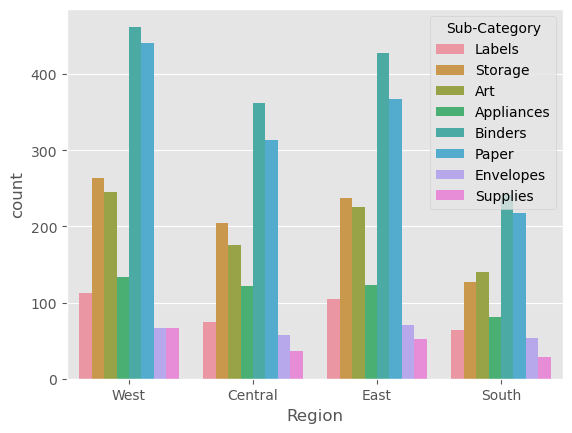

In [111]:
sns.countplot(data=off ,x= "Region" ,hue='Sub-Category')

# find the top Frequancy of all sub_category of furn


<Axes: >

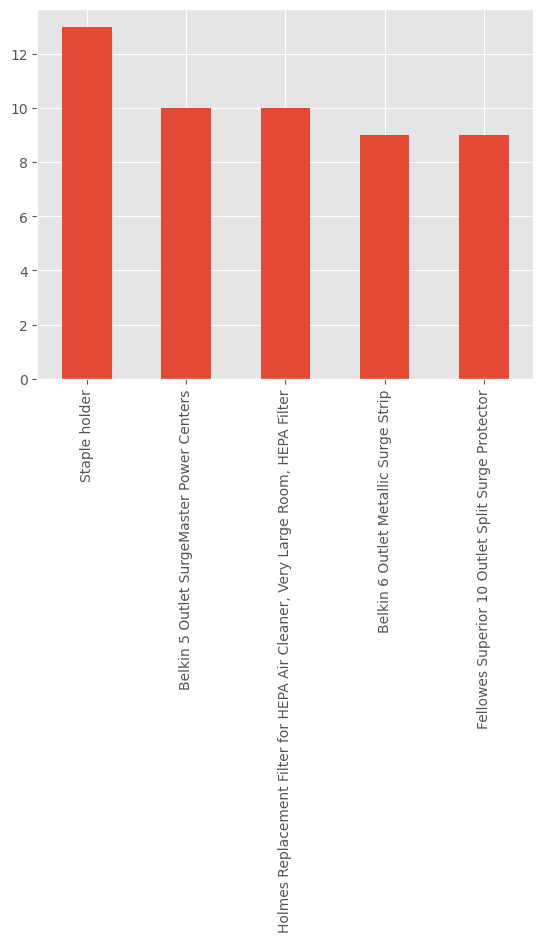

In [112]:
off [off["Sub-Category"]=="Appliances"]["Product Name"].value_counts()[0:5].plot(kind='bar')

<Axes: >

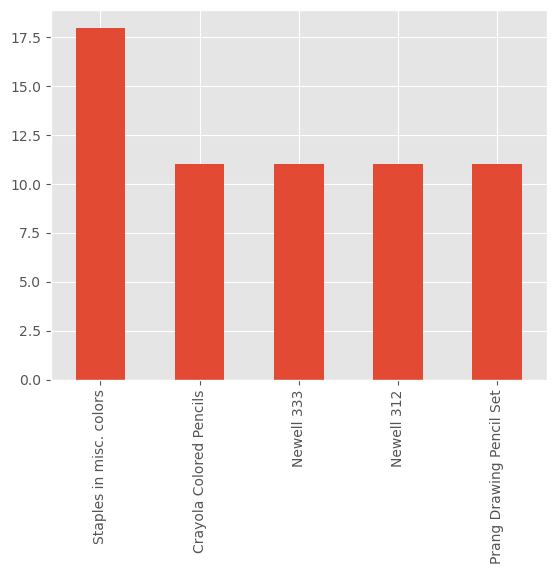

In [113]:
off [off["Sub-Category"]=="Art"]["Product Name"].value_counts()[0:5].plot(kind='bar')

<Axes: >

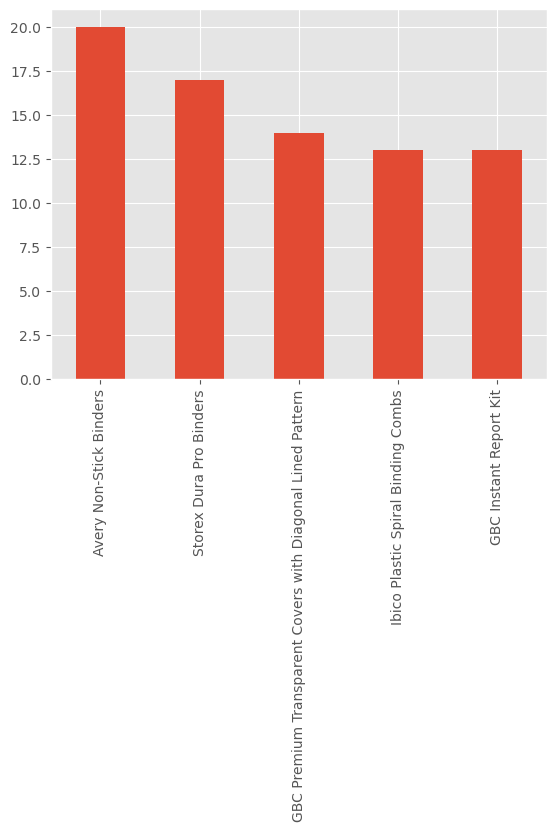

In [114]:
off [off["Sub-Category"]=="Binders"]["Product Name"].value_counts()[0:5].plot(kind='bar')

<Axes: >

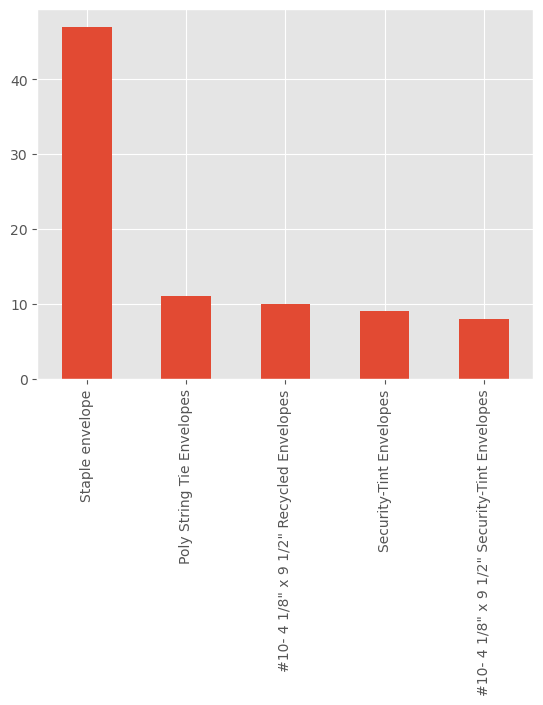

In [115]:
off [off["Sub-Category"]=="Envelopes"]["Product Name"].value_counts()[0:5].plot(kind='bar')

<Axes: >

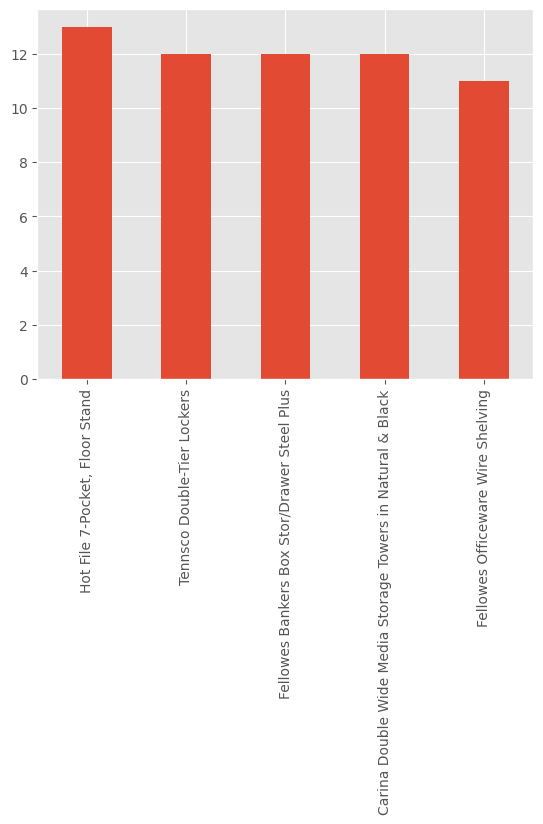

In [116]:
off [off["Sub-Category"]=="Storage"]["Product Name"].value_counts()[0:5].plot(kind='bar')

<Axes: >

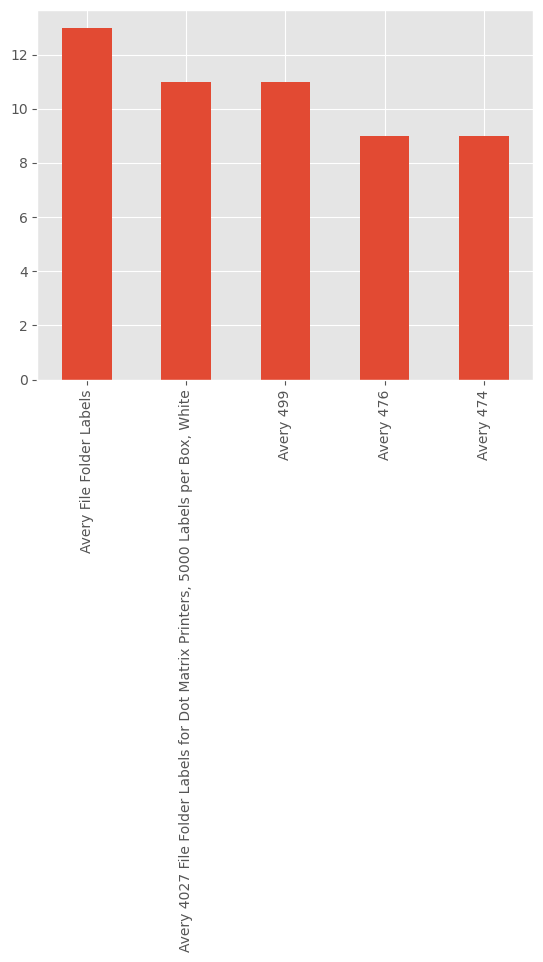

In [117]:
off [off["Sub-Category"]=="Labels"]["Product Name"].value_counts()[0:5].plot(kind='bar')

<Axes: >

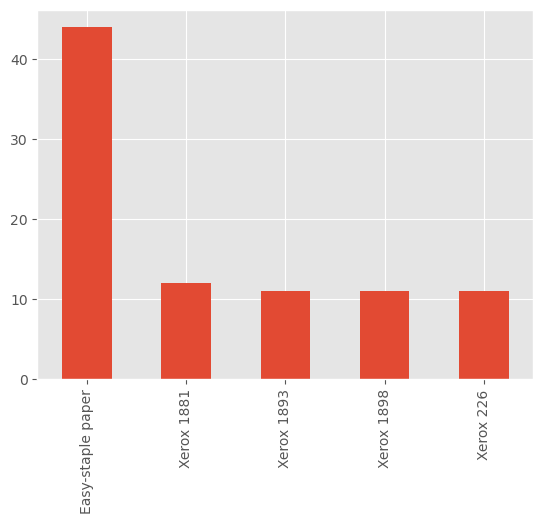

In [118]:
off [off["Sub-Category"]=="Paper"]["Product Name"].value_counts()[0:5].plot(kind='bar')

<Axes: >

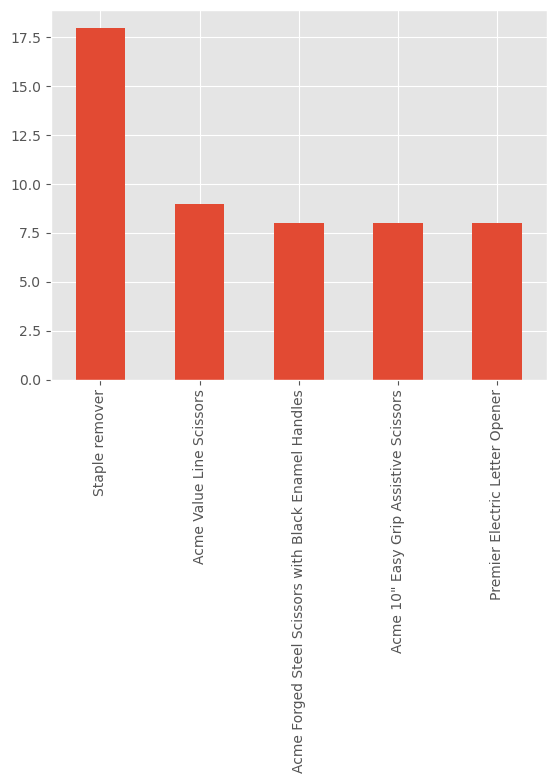

In [119]:
off [off["Sub-Category"]=="Supplies"]["Product Name"].value_counts()[0:5].plot(kind='bar')

# find the top 5 state by furn

<Axes: xlabel='count', ylabel='State'>

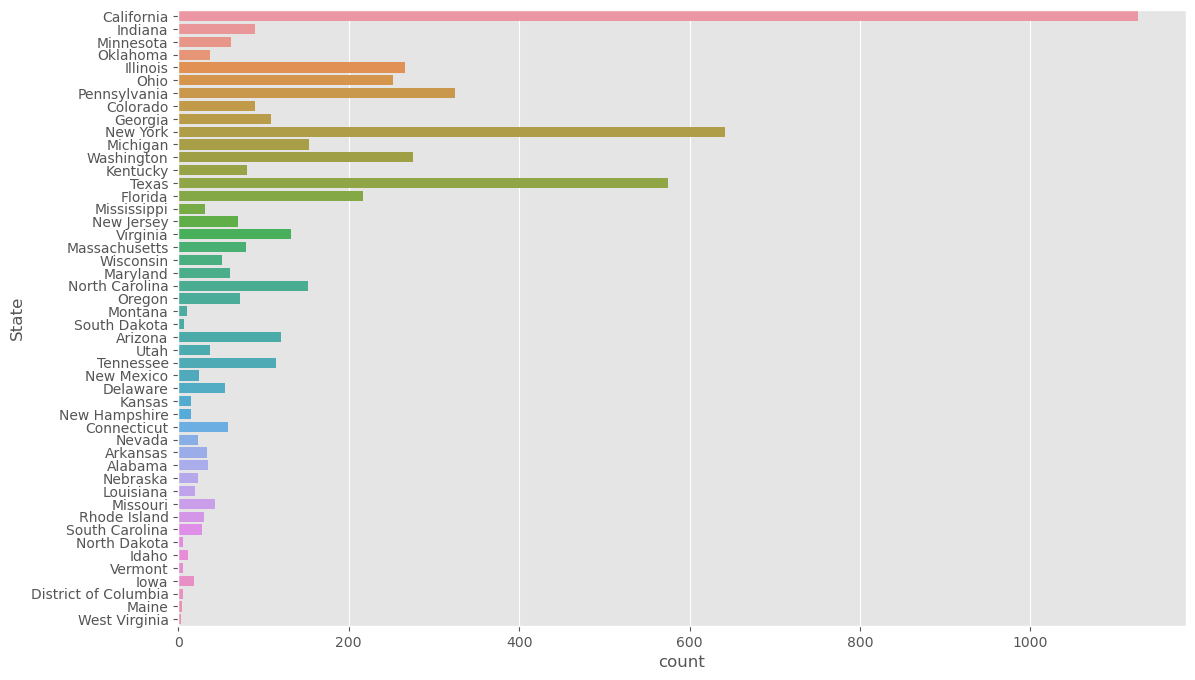

In [120]:
plt.figure(figsize=(13,8))
sns.countplot(y=off.State)


# simple time Series

In [121]:
plt.figure(figsize=(8,15))
t= off.pivot_table(index="month" , columns=["Sub-Category","year"] ,values="Sales" , aggfunc={"Sales" :"sum"},fill_value=0)
t

Sub-Category Appliances                                    Art           \
year               2015      2016      2017      2018     2015     2016   
month                                                                     
1              1601.949     3.552  1631.094  1795.277  368.648  186.398   
2               293.250   831.016  1183.860  2134.423  183.258  208.644   
3               358.802   810.657  2986.258  1607.558  277.354  138.844   
4              1194.421  1995.344   418.152   587.414  347.458  542.670   
5              1220.520  2247.736  1788.387  2994.576  453.504  342.388   
6               590.032    16.170  1652.712  1524.672  437.884  374.540   
7               295.188   762.708  1508.965  2083.549  275.908  286.542   
8               647.305   982.006  2163.977  4233.773  162.362  396.184   
9              1733.512  2120.996  2131.176  1892.459  462.668  607.050   
10              420.792  1881.182  1879.588  2461.076  260.480  342.768   
11             1778.071  3430.847  1644.105  3457.529  385.816  831.206   
12             1930.079  1934.590  1144.680  2403.906  329.566  368.228   

Sub-Category                        Binders              ...     Paper  \
year             2017      2018        2015        2016  ...      2017   
month                                                    ...             
1             401.530   276.908   448.39725   574.92125  ...  1040.630   
2             400.656   818.866   323.30725   570.06350  ...   453.628   
3             362.536   425.134  1030.94175   680.60075  ...  1360.100   
4             469.220   541.088   624.44325   821.48975  ...  1276.846   
5             495.312   466.060  1040.56625  1062.74825  ...  2278.034   
6             126.674   620.304   905.11725   892.82100  ...  2079.400   
7             440.824   511.176   937.74575   733.99850  ...  1124.216   
8             298.752   397.554   930.02775   785.50950  ...  1350.398   
9             448.264   887.638   798.10000  1871.16025  ...  1106.584   
10            501.542   387.404   483.34400   429.75225  ...  1783.396   
11            471.480  1142.646  1143.69125  1616.35425  ...   984.566   
12            292.048   565.982  1597.30550  1064.99375  ...  1465.404   

Sub-Category             Storage                                 Supplies  \
year              2018      2015      2016      2017      2018       2015   
month                                                                       
1             1200.214  3221.359  1162.259  2980.882  4215.843    0.00000   
2             1278.668  1509.589   859.964  2629.031  3948.787  134.71975   
3             2608.452  1693.777  1558.431  2545.180  4746.799  233.29975   
4              733.224  3463.900  1247.889  3349.831  3303.232    0.00000   
5             1500.258  3202.717  4021.681  5394.048  2880.550  177.21975   
6             2234.994  2852.235  3602.575  2976.166  5269.496   30.54800   
7              860.802  2710.316  1551.850  4956.280  3154.632  243.65175   
8             1570.924  2566.341  6333.570  2956.209  6428.633   62.99600   
9             3242.500  6340.540  5878.392  4328.081  6199.959   14.66000   
10            1261.608  3999.862  4399.016  5162.012  4978.164  166.67975   
11            2017.256  6515.166  6169.546  5559.311  6801.549   86.76200   
12            2250.556  2924.606  2729.262  6351.770  7911.386  185.90775   

Sub-Category                                   
year               2016       2017       2018  
month                                          
1             165.39600  126.44000  162.93775  
2              10.94400   25.71000  194.78775  
3             152.71975  264.06950  315.73950  
4              18.72000  412.38350  412.97925  
5             141.72800  370.30975  112.50400  
6               0.00000  238.71950  157.07400  
7              52.59000  252.16000  276.40575  
8             187.46775  297.90575  172.11000  
9             126.99000   90.35800  313.03550  
10            151.34000  143.29

<Figure size 800x1500 with 0 Axes>

Text(0.5, 1.0, 'Appliances by years')

<Figure size 1500x1500 with 0 Axes>

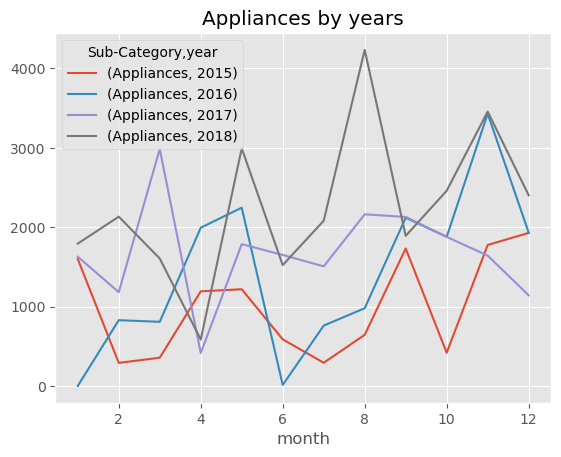

In [122]:
plt.figure(figsize=(15,15))
t.iloc[:,0:4].plot(kind="line")
plt.title("Appliances by years")

Text(0.5, 1.0, 'Art by years')

<Figure size 1500x1500 with 0 Axes>

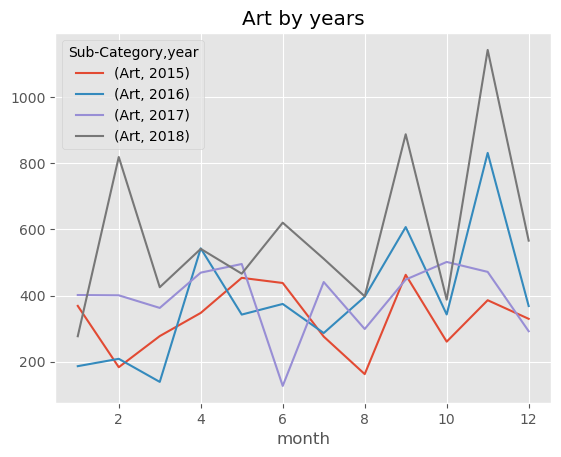

In [123]:
plt.figure(figsize=(15,15))
t.iloc[:,4:8].plot(kind="line")
plt.title("Art by years")

Text(0.5, 1.0, 'Binders by years')

<Figure size 1500x1500 with 0 Axes>

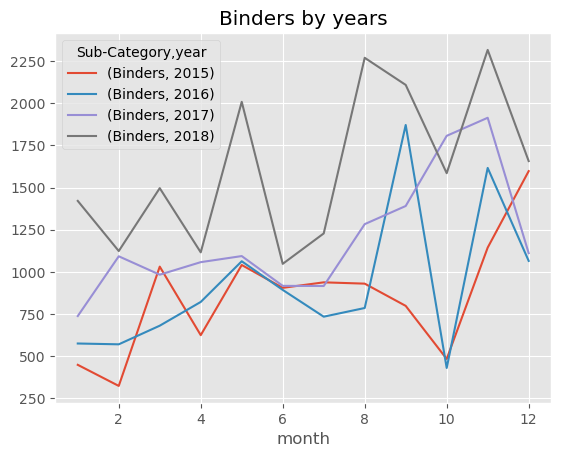

In [124]:
plt.figure(figsize=(15,15))
t.iloc[:,8:12].plot(kind="line")
plt.title("Binders by years")

Text(0.5, 1.0, 'Envelopes by years')

<Figure size 1500x1500 with 0 Axes>

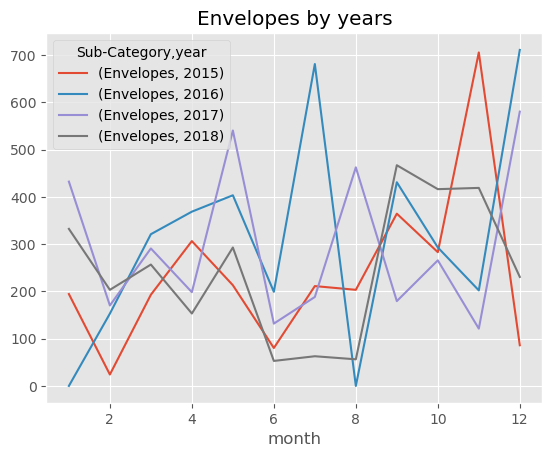

In [125]:
plt.figure(figsize=(15,15))
t.iloc[:,12:16].plot(kind="line")
plt.title("Envelopes by years")

Text(0.5, 1.0, 'Storage by years')

<Figure size 1500x1500 with 0 Axes>

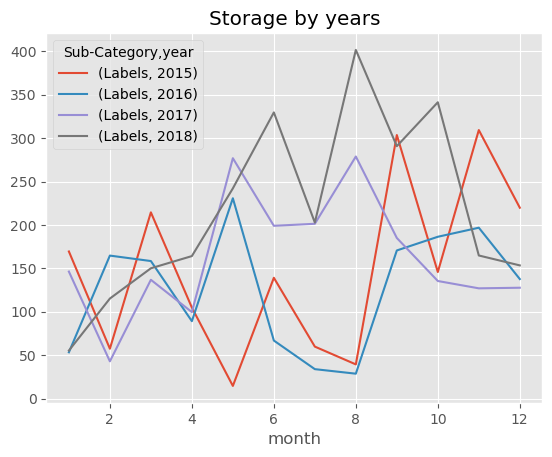

In [126]:
plt.figure(figsize=(15,15))
t.iloc[:,16:20].plot(kind="line")
plt.title("Storage by years")

Text(0.5, 1.0, 'Paper by years')

<Figure size 1500x1500 with 0 Axes>

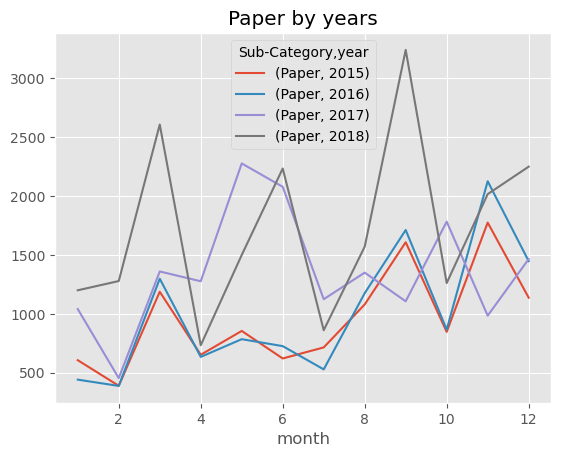

In [127]:
plt.figure(figsize=(15,15))
t.iloc[:,20 :24].plot(kind="line")
plt.title("Paper by years")

Text(0.5, 1.0, 'Storage by years')

<Figure size 1500x1500 with 0 Axes>

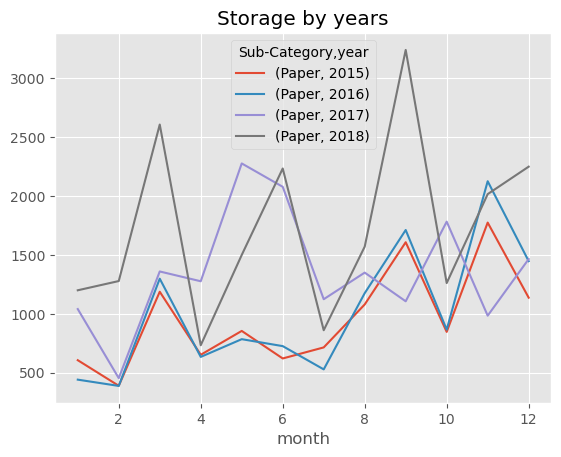

In [128]:
plt.figure(figsize=(15,15))
t.iloc[:,20 :24].plot(kind="line")
plt.title("Storage by years")

Text(0.5, 1.0, 'Supplies by years')

<Figure size 1500x1500 with 0 Axes>

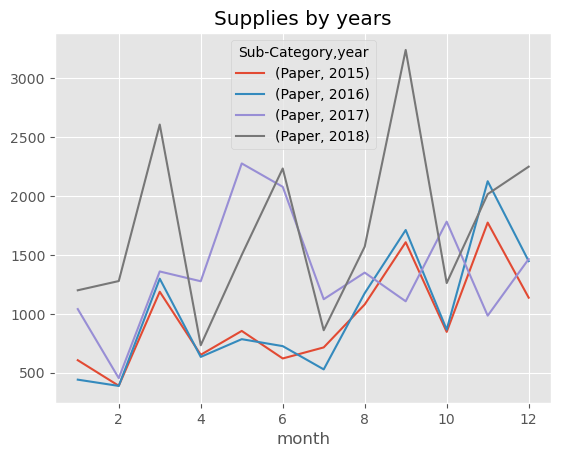

In [129]:
plt.figure(figsize=(15,15))
t.iloc[:,20 :24].plot(kind="line")
plt.title("Supplies by years")